#1.DATA EXPORTATION
SERIE A  Midfielders

In [1]:
import requests
import pandas as pd
import time
import numpy as np

# --- API key ---
api_key = 'ba53d657e0973b0ae6f5a6b0be2f88d1'

# --- Request headers ---
headers = {
    'x-apisports-key': api_key
}

# --- Serie A league ID and season ---
league_id = 135  # Serie A
season = 2023
page = 1
all_players = []

print("Starting API data collection for Serie A Midfielders (2023/2024 season)...")

# --- Fetch player data page by page ---
while True:
    print(f"Requesting page {page}...")
    params = {
        'league': league_id,
        'season': season,
        'page': page
    }
    response = requests.get('https://v3.football.api-sports.io/players', headers=headers, params=params)
    data = response.json()

    if data['errors']:
        print(f"❌ API Error on page {page}: {data['errors']}")
        break
    if not data['response']:
        break

    for player_entry in data['response']:
        player_info = player_entry['player']
        stats = player_entry['statistics'][0]

        merged_stats = {
            'name': player_info['name'],
            'team': stats['team']['name'],
            'position': stats['games']['position'],
            'minutes': stats['games']['minutes'],
            'duels_total': stats.get('duels', {}).get('total', 0),
            'duels_won': stats.get('duels', {}).get('won', 0),
            'goals': stats.get('goals', {}).get('total', 0),
            'shots_total': stats.get('shots', {}).get('total', 0),
            'shots_on_target': stats.get('shots', {}).get('on_target', 0),
            'assists': stats.get('goals', {}).get('assists', 0),
            'dribbles_attempts': stats.get('dribbles', {}).get('attempts', 0),
            'dribbles_success': stats.get('dribbles', {}).get('success', 0),
            'touches_total': stats.get('touches', {}).get('total', 0),
            'passes_key': stats.get('passes', {}).get('key', 0),
            'passes_total': stats.get('passes', {}).get('total', 0),
            'passes_accuracy': stats.get('passes', {}).get('accuracy', 0),
            'tackles': stats.get('tackles', {}).get('total', 0),
            'interceptions': stats.get('tackles', {}).get('interceptions', 0),
        }
        all_players.append(merged_stats)
    page += 1
    time.sleep(1)

# --- Convert to DataFrame ---
df = pd.DataFrame(all_players)

# --- Filter for midfielders with ≥540 minutes ---
midfielders_df = df[(df['position'] == 'Midfielder') & (df['minutes'] >= 540)].copy()

# --- Derived metrics ---
midfielders_df['shots_on_target_perc'] = np.where(
    midfielders_df['shots_total'].fillna(0) != 0,
    (midfielders_df['shots_on_target'].fillna(0) / midfielders_df['shots_total'].fillna(0)) * 100,
    0.0
)

midfielders_df['dribbles_success_perc'] = np.where(
    midfielders_df['dribbles_attempts'].fillna(0) != 0,
    (midfielders_df['dribbles_success'].fillna(0) / midfielders_df['dribbles_attempts'].fillna(0)) * 100,
    0.0
)

# --- Save to CSV ---
output_filename = "seriea_midfielders_2023_24_api_stats.csv"
midfielders_df.to_csv(output_filename, index=False)
print(f"\n✅ Serie A Midfielders API stats (filtered for ≥540 mins) saved to: {output_filename}")

# --- Display sample and shape ---
print("\nFirst 5 rows of the exported Midfielders API stats:")
print(midfielders_df.head().to_string())
print(f"\nShape of the exported Midfielders API stats: {midfielders_df.shape}")


Starting API data collection for Serie A Midfielders (2023/2024 season)...
Requesting page 1...
Requesting page 2...
Requesting page 3...
Requesting page 4...
Requesting page 5...
Requesting page 6...
Requesting page 7...
Requesting page 8...
Requesting page 9...
Requesting page 10...
Requesting page 11...
Requesting page 12...
Requesting page 13...
Requesting page 14...
Requesting page 15...
Requesting page 16...
Requesting page 17...
Requesting page 18...
Requesting page 19...
Requesting page 20...
Requesting page 21...
Requesting page 22...
Requesting page 23...
Requesting page 24...
Requesting page 25...
Requesting page 26...
Requesting page 27...
Requesting page 28...
Requesting page 29...
Requesting page 30...
Requesting page 31...
Requesting page 32...
Requesting page 33...
Requesting page 34...
Requesting page 35...
Requesting page 36...
Requesting page 37...
Requesting page 38...
Requesting page 39...
Requesting page 40...
Requesting page 41...
Requesting page 42...
Requesting

In [2]:
import pandas as pd

# --- Load the API-exported Serie A midfielders stats ---
try:
    df_api_midfielders = pd.read_csv("seriea_midfielders_2023_24_api_stats.csv")
    print("✅ Serie A Midfielders API stats loaded successfully.")
except FileNotFoundError:
    print("❌ Error: 'seriea_midfielders_2023_24_api_stats.csv' not found.")
    print("Please ensure this file has been generated by the 'Serie A Midfielders API Data Export' step.")
    exit()
except Exception as e:
    print(f"❌ An unexpected error occurred during file loading: {e}")
    exit()

# --- Re-confirm filtering for midfielders with ≥540 minutes ---
midfielders_filtered = df_api_midfielders[
    (df_api_midfielders['position'] == 'Midfielder') &
    (df_api_midfielders['minutes'] >= 540)
].copy()

print(f"\n✅ Midfielders with 540 minutes or more found (re-confirmed): {len(midfielders_filtered)}")

# --- Display available columns ---
print("\nAvailable columns for filtered midfielders:")
print(midfielders_filtered.columns.tolist())

# --- Save filtered dataset ---
output_filename = "seriea_midfielders_2023_24_filtered.csv"
midfielders_filtered.to_csv(output_filename, index=False)
print(f"\n✅ Filtered midfielders dataset saved as: {output_filename}")

# --- Display sample ---
print("\nFirst 5 rows of the filtered midfielders dataset:")
print(midfielders_filtered.head().to_string())


✅ Serie A Midfielders API stats loaded successfully.

✅ Midfielders with 540 minutes or more found (re-confirmed): 116

Available columns for filtered midfielders:
['name', 'team', 'position', 'minutes', 'duels_total', 'duels_won', 'goals', 'shots_total', 'shots_on_target', 'assists', 'dribbles_attempts', 'dribbles_success', 'touches_total', 'passes_key', 'passes_total', 'passes_accuracy', 'tackles', 'interceptions', 'shots_on_target_perc', 'dribbles_success_perc']

✅ Filtered midfielders dataset saved as: seriea_midfielders_2023_24_filtered.csv

First 5 rows of the filtered midfielders dataset:
             name         team    position  minutes  duels_total  duels_won  goals  shots_total  shots_on_target  assists  dribbles_attempts  dribbles_success  touches_total  passes_key  passes_total  passes_accuracy  tackles  interceptions  shots_on_target_perc  dribbles_success_perc
0     A. Candreva  Salernitana  Midfielder   2759.0        143.0       76.0    6.0         43.0                

I am enhancing the Serie A 2023/24 midfielder dataset by adding accurate passing accuracy values and defensive actions from FBref as they were missing from the previous dataset(API).

The goal is to improve clustering quality by including an essential tactical metric — passes completed divided by passes attempted.

To make this work, I must:

    Load the 3 datasets (the API data and FBref passing data and defensive actions)

    Ensure player and team names are aligned

    Merge them carefully

    Update our dataset with the accurate passes_accuracy values

    Save the cleaned and enriched version for clustering



In [3]:
%pip install unidecode

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.8/235.8 kB 922.0 kB/s eta 0:00:00


In [4]:
import pandas as pd
import unidecode

# --- Step 1: Load the three datasets for Serie A midfielders ---
try:
    api_df = pd.read_csv("seriea_midfielders_2023_24_api_stats.csv")
    passing_df = pd.read_csv("Serie_A_players_passing.csv", encoding='ISO-8859-1', sep=None, engine='python')
    defensive_df = pd.read_csv("Serie_A_defensive_actions.csv", encoding='ISO-8859-1', sep=None, engine='python')
    print("✅ All datasets loaded successfully for Serie A midfielders.")
except FileNotFoundError as e:
    print(f"❌ Error loading file: {e}. Make sure all CSV files are in the correct directory.")
    exit()
except Exception as e:
    print(f"❌ An unexpected error occurred during file loading: {e}")
    exit()

# --- Step 2: Clean and standardize player and team names ---
api_df['name_clean'] = api_df['name'].apply(lambda x: unidecode.unidecode(str(x)).lower().strip())
api_df['team_clean'] = api_df['team'].apply(lambda x: unidecode.unidecode(str(x)).lower().strip())

passing_df['name_clean'] = passing_df['Player'].apply(lambda x: unidecode.unidecode(str(x)).lower().strip())
passing_df['team_clean'] = passing_df['Squad'].apply(lambda x: unidecode.unidecode(str(x)).lower().strip())

defensive_df['name_clean'] = defensive_df['Player'].apply(lambda x: unidecode.unidecode(str(x)).lower().strip())
defensive_df['team_clean'] = defensive_df['Squad'].apply(lambda x: unidecode.unidecode(str(x)).lower().strip())

print("✅ Player and team names cleaned and standardized for Serie A midfielders.")

# --- Step 3: Merge API data with FBref Passing Data ---
merged_df = pd.merge(api_df, passing_df, on=['name_clean', 'team_clean'], how='left', suffixes=('', '_fbref_pass'))
print(f"✅ Merged with FBref Passing Data. Total rows: {len(merged_df)}")

# --- Step 4: Update 'passes_accuracy' with FBref values where available ---
merged_df['passes_accuracy'] = merged_df['Cmp%'].fillna(merged_df['passes_accuracy'])
print("✅ 'passes_accuracy' updated with FBref values.")

# --- Step 5: Merge with FBref Defensive Actions ---
merged_final = pd.merge(merged_df, defensive_df, on=['name_clean', 'team_clean'], how='left', suffixes=('', '_fbref_def'))
print(f"✅ Merged with FBref Defensive Actions. Total rows: {len(merged_final)}")

# --- Step 6: Drop redundant columns ---
columns_to_drop = [
    'Player_fbref_pass', 'Squad_fbref_pass', 'Cmp%',
    'Player_fbref_def', 'Squad_fbref_def'
]
columns_to_drop_existing = [col for col in columns_to_drop if col in merged_final.columns]
merged_final.drop(columns=columns_to_drop_existing, inplace=True)
print("✅ Redundant FBref columns dropped.")

# --- Step 7: Save the cleaned and enriched merged dataset ---
merged_final.to_csv("seriea_midfielders_2023_24_combined.csv", index=False)
print("✅ Merged and cleaned dataset saved as: seriea_midfielders_2023_24_combined.csv")

# --- Display sample ---
print("\nSample of the final combined DataFrame:")
print(merged_final.head())

# --- Check for unmatched players ---
unmatched_passing = merged_df[merged_df['Cmp%'].isna()]['name_clean'].unique()
if len(unmatched_passing) > 0:
    print(f"\n⚠️ Players without matching FBref Passing data (sample): {unmatched_passing[:5]}...")

unmatched_defensive = merged_final[merged_final['TklW'].isna()]['name_clean'].unique()
if len(unmatched_defensive) > 0:
    print(f"\n⚠️ Players without matching FBref Defensive data (sample): {unmatched_defensive[:5]}...")


✅ All datasets loaded successfully for Serie A midfielders.
✅ Player and team names cleaned and standardized for Serie A midfielders.
✅ Merged with FBref Passing Data. Total rows: 116
✅ 'passes_accuracy' updated with FBref values.
✅ Merged with FBref Defensive Actions. Total rows: 116
✅ Redundant FBref columns dropped.
✅ Merged and cleaned dataset saved as: seriea_midfielders_2023_24_combined.csv

Sample of the final combined DataFrame:
             name         team    position  minutes  duels_total  duels_won  \
0     A. Candreva  Salernitana  Midfielder   2759.0        143.0       76.0   
1    K. Strootman        Genoa  Midfielder   1209.0        109.0       51.0   
2   Joan Gonzàlez        Lecce  Midfielder   1285.0        189.0      108.0   
3    Luis Alberto        Lazio  Midfielder   2321.0        203.0       93.0   
4  R. Gagliardini        Monza  Midfielder   2368.0        236.0      136.0   

   goals  shots_total  shots_on_target  assists  ...  Tkl%  Lost  Blocks   Sh  \
0  

The following code block is responsible for merging the primary API data for Ligue 1 midfielders with additional detailed passing and defensive statistics from FBref. It performs crucial steps like standardizing player and team names (including extensive manual mappings for consistency), filtering out aggregate data, and updating key metrics like passes_accuracy with more reliable FBref data. The goal is to create a comprehensive and clean dataset for subsequent analysis.

In [5]:
import pandas as pd
import unidecode

# --- Step 1: Load the three datasets for Serie A midfielders ---
try:
    api_df = pd.read_csv("seriea_midfielders_2023_24_api_stats.csv")
    passing_df = pd.read_csv("Serie_A_players_passing.csv", encoding='ISO-8859-1', sep=None, engine='python')
    defensive_df = pd.read_csv("Serie_A_defensive_actions.csv", encoding='ISO-8859-1', sep=None, engine='python')
    print("✅ All datasets loaded successfully for Serie A midfielders.")
except FileNotFoundError as e:
    print(f"❌ Error loading file: {e}")
    exit()
except Exception as e:
    print(f"❌ Unexpected error: {e}")
    exit()

# --- Step 2: Clean HTML entities in player names ---
api_df['name'] = api_df['name'].str.replace('&apos;', "'", regex=False)
passing_df['Player'] = passing_df['Player'].str.replace('&apos;', "'", regex=False)
defensive_df['Player'] = defensive_df['Player'].str.replace('&apos;', "'", regex=False)
print("✅ HTML apostrophes standardized.")

# --- Step 3: Clean and standardize player and team names ---
api_df['name_clean'] = api_df['name'].apply(lambda x: unidecode.unidecode(str(x)).lower().strip())
api_df['team_clean'] = api_df['team'].apply(lambda x: unidecode.unidecode(str(x)).lower().strip())

passing_df['name_clean'] = passing_df['Player'].apply(lambda x: unidecode.unidecode(str(x)).lower().strip())
passing_df['team_clean'] = passing_df['Squad'].apply(lambda x: unidecode.unidecode(str(x)).lower().strip())

defensive_df['name_clean'] = defensive_df['Player'].apply(lambda x: unidecode.unidecode(str(x)).lower().strip())
defensive_df['team_clean'] = defensive_df['Squad'].apply(lambda x: unidecode.unidecode(str(x)).lower().strip())

# --- Step 4: Team name standardization ---
team_name_standardization = {
    'internazionale': 'inter',
    'ac milan': 'milan',
    'ssc napoli': 'napoli',
    'as roma': 'roma',
    'juventus': 'juventus',
    'atalanta': 'atalanta',
    'fiorentina': 'fiorentina',
    'lazio': 'lazio',
    'bologna': 'bologna',
    'torino': 'torino',
    'monza': 'monza',
    'lecce': 'lecce',
    'cagliari': 'cagliari',
    'genoa': 'genoa',
    'empoli': 'empoli',
    'verona': 'verona',
    'sassuolo': 'sassuolo',
    'udinese': 'udinese',
    'salernitana': 'salernitana',
    'frosinone': 'frosinone',
}

api_df['team_clean'] = api_df['team_clean'].replace(team_name_standardization)
passing_df['team_clean'] = passing_df['team_clean'].replace(team_name_standardization)
defensive_df['team_clean'] = defensive_df['team_clean'].replace(team_name_standardization)

# --- Step 5: Remove 'squad' entries from FBref ---
passing_df = passing_df[passing_df['team_clean'] != 'squad'].copy()
defensive_df = defensive_df[defensive_df['team_clean'] != 'squad'].copy()
print("✅ 'squad' entries removed from FBref datasets.")

# --- Step 6: Manual player name mapping (placeholder) ---
player_name_manual_mapping = {


    'a. candreva': 'antonio candreva',
    'k. strootman': 'kevin strootman',
    'j. jankto': 'jakub jankto',
    'r. gagliardini': 'roberto gagliardini',
    'm. pessina': 'matteo pessina',
    'a. duncan': 'alfred duncan',
    'm. badelj': 'milan badelj',
    's. zurkowski': 'szymon żurkowski',
    'a. grassi': 'alberto grassi',
    'k. linetty': 'karol linetty',
    'a. colpani': 'andrea colpani',
    'm. lopez': 'maxime lopez',
    'h. hateboer': 'hans hateboer',
    'g. kastanos': 'grigoris kastanos',
    'l. mazzitelli': 'luca mazzitelli',
    's. serdar': 'suat serdar',
    'd. lazovic': 'darko lazović',
    'o. duda': 'ondrej duda',
    't. suslov': 'tomáš suslov',
    'n. vlasic': 'nikola vlašić',
    'i. ilic': 'ivan ilić',
    'g. gaetano': 'gianluca gaetano',
    'r. marin': 'răzvan marin',
    'a. deiola': 'alessandro deiola',
    'n. viola': 'nicolas viola',
    'm. prati': 'matteo prati',
    'm. vecino': 'matías vecino',
    'm. guendouzi': 'mattéo guendouzi',
    'd. cataldi': 'danilo cataldi',
    'm. lazzari': 'manuel lazzari',
    'j. akpa akpro': 'jean-daniel akpa-akpro',
    't. basic': 'toma bašić',
    'd. zappacosta': 'davide zappacosta',
    'm. zaccagni': 'mattia zaccagni',
    'i. sulemana': 'ibrahim sulemana',
    'm. brescianini': 'marco brescianini',
    'm. pasalic': 'mario pašalić',
    'ederson': 'éderson',
    'm. de roon': 'marten de roon',
    'l. samardzic': 'lazar samardžić',
    'c. pulisic': 'christian pulisic',
    'y. adli': 'yacine adli',
    'r. loftus-cheek': 'ruben loftus-cheek',
    'i. bennacer': 'ismaël bennacer',
    's. ricci': 'samuele ricci',
    'y. musah': 'yunus musah',
    'w. bondo': 'warren bondo',
    'a. barak': 'antonín barák',
    'j. brekalo': 'josip brekalo',
    'r. mandragora': 'rolando mandragora',
    'j. fazzini': 'jacopo fazzini',
    'w. mckennie': 'weston mckennie',
    'f. kostic': 'filip kostić',
    'm. locatelli': 'manuel locatelli',
    't. koopmeiners': 'teun koopmeiners',
    'f. miretti': 'fabio miretti',
    'p. zielinski': 'piotr zieliński',
    'h. mkhitaryan': 'henrikh mkhitaryan',
    'h. calhanoglu': 'hakan çalhanoğlu',
    'n. barella': 'nicolò barella',
    'd. frattesi': 'davide frattesi',
    'n. zalewski': 'nicola zalewski',
    'k. asllani': 'kristjan asllani',
    'v. carboni': 'valentin carboni',
    'b. cristante': 'bryan cristante',
    'l. pellegrini': 'lorenzo pellegrini',
    'e. bove': 'edoardo bove',
    'k. thorstvedt': 'kristian thorstvedt',
    'u. racic': 'uroš račić',
    'n. bajrami': 'nedim bajrami',
    'c. volpato': 'cristian volpato',
    'm. payero': 'martín payero',
    's. lovric': 'sandi lovrić',
    'a. zambo anguissa': 'andre-frank zambo anguissa',
    'j. cajuste': 'jens cajuste',
    's. lobotka': 'stanislav lobotka',
    'm. frendrup': 'morten frendrup',
    'm. thorsby': 'morten thorsby',
    'f. gelli': 'francesco gelli',
    'p. azzi': 'paulo azzi',
    'm. aebischer': 'michel aebischer',
    'n. moro': 'nikola moro',
    'r. freuler': 'remo freuler',
    'l. ferguson': 'lewis ferguson',
    'k. urbanski': 'kacper urbanski',
    'l. coulibaly': 'lassana coulibaly',
    'y. ramadani': 'ylber ramadani',
    'l. banda': 'lameck banda',
    'h. rafia': 'hamza rafia',
    'm. kaba': 'mohamed kaba',
    'd. kamada': 'daichi kamada',
    't. reijnders': 'tijjani reijnders',
    'r. krunic': 'rade krunić',
    'a. makoumbou': 'antoine makoumbou',
    'a. miranchuk': 'aleksei miranchuk',
    'h. aouar': 'houssem aouar',
    'g. bonaventura': 'giacomo bonaventura',
    'f. anderson': 'felipe anderson',
    'n. nandez': 'nahitan nández',
    'm. henrique': 'matheus henrique',
    'walace': 'walace',
    'r. oudin': 'remi oudin',
    'm. hongla': 'martin hongla',
    'g. maggiore': 'giulio maggiore',
    'm. legowski': 'mateusz łęgowski',
    'a. blin': 'alexis blin',
    's. bastoni': 'simone bastoni',
    'l. paredes': 'leandro paredes',
    'r. malinovskyi': 'ruslan malinovskyi',
    'r. pereyra': 'roberto pereyra',
    'a. martegani': 'agustín martegani',
}




api_df['name_clean'] = api_df['name_clean'].replace(player_name_manual_mapping)
print("✅ Manual player name mapping applied.")

# --- Step 7: Diagnostics before merge ---
print("\n--- Sample of Cleaned Names and Teams ---")
print(api_df[['name', 'name_clean', 'team', 'team_clean']].head().to_string())
print(passing_df[['Player', 'name_clean', 'Squad', 'team_clean']].head().to_string())
print(defensive_df[['Player', 'name_clean', 'Squad', 'team_clean']].head().to_string())

print("\n--- Unique Cleaned Names ---")
print("API Players:", api_df['name_clean'].unique()[:10].tolist())
print("FBref Passing Players:", passing_df['name_clean'].unique()[:10].tolist())
print("FBref Defensive Players:", defensive_df['name_clean'].unique()[:10].tolist())

# --- Step 8: Merge API data with FBref Passing Data ---
merged_df = pd.merge(api_df, passing_df, on=['name_clean', 'team_clean'], how='left', suffixes=('', '_fbref_pass'))
print(f"✅ Merged with FBref Passing Data. Total rows: {len(merged_df)}")

# --- Diagnostic: Missing values before updating passes_accuracy ---
print("\n--- Diagnostic: Missing values before updating 'passes_accuracy' ---")
print(f"Missing 'passes_accuracy' (API): {merged_df['passes_accuracy'].isnull().sum()}")
print(f"Missing 'Cmp%' (FBref): {merged_df['Cmp%'].isnull().sum()}")

# --- Step 9: Update 'passes_accuracy' with FBref values where available ---
merged_df['passes_accuracy'] = merged_df['Cmp%'].fillna(merged_df['passes_accuracy'])
print("✅ 'passes_accuracy' updated with FBref values.")

# --- Diagnostic: Missing values after update ---
print(f"Missing 'passes_accuracy' after update: {merged_df['passes_accuracy'].isnull().sum()}")

# --- Step 10: Merge with FBref Defensive Actions ---
merged_final = pd.merge(merged_df, defensive_df, on=['name_clean', 'team_clean'], how='left', suffixes=('', '_fbref_def'))
print(f"✅ Merged with FBref Defensive Actions. Total rows: {len(merged_final)}")

# --- Step 11: Refined unmatched diagnostics ---
unmatched_passing_rows = merged_final[merged_final['Cmp%'].isna()]
unmatched_defensive_rows = merged_final[merged_final['TklW'].isna()]

print(f"\nTotal unmatched FBref Passing entries: {len(unmatched_passing_rows.drop_duplicates(['name_clean', 'team_clean']))}")
print(f"Total unmatched FBref Defensive entries: {len(unmatched_defensive_rows.drop_duplicates(['name_clean', 'team_clean']))}")

# --- Step 12: Drop redundant columns ---
columns_to_drop = [
    'Player_fbref_pass', 'Squad_fbref_pass', 'Cmp%',
    'Player_fbref_def', 'Squad_fbref_def'
]
columns_to_drop_existing = [col for col in columns_to_drop if col in merged_final.columns]
merged_final.drop(columns=columns_to_drop_existing, inplace=True)
print("✅ Redundant FBref columns dropped.")

# --- Step 13: Save final cleaned dataset ---
output_filename = "seriea_midfielders_2023_24_combined.csv"
merged_final.to_csv(output_filename, index=False)
print(f"✅ Final merged dataset saved as: {output_filename}")

# --- Step 14: Sample output and unmatched diagnostics ---
print("\nSample of final combined DataFrame:")
print(merged_final.head().to_string())

print("\n--- Sample of unmatched players (passing) ---")
for name in unmatched_passing_rows['name_clean'].unique()[:10]:
    print(f"Unmatched (passing): {name}")

print("\n--- Sample of unmatched players (defensive) ---")
for name in unmatched_defensive_rows['name_clean'].unique()[:10]:
    print(f"Unmatched (defensive): {name}")



✅ All datasets loaded successfully for Serie A midfielders.
✅ HTML apostrophes standardized.
✅ 'squad' entries removed from FBref datasets.
✅ Manual player name mapping applied.

--- Sample of Cleaned Names and Teams ---
             name           name_clean         team   team_clean
0     A. Candreva     antonio candreva  Salernitana  salernitana
1    K. Strootman      kevin strootman        Genoa        genoa
2   Joan Gonzàlez        joan gonzalez        Lecce        lecce
3    Luis Alberto         luis alberto        Lazio        lazio
4  R. Gagliardini  roberto gagliardini        Monza        monza
             Player        name_clean    Squad team_clean
0     Tammy Abraham     tammy abraham     Roma       roma
1  Francesco Acerbi  francesco acerbi    Inter      inter
2       Yacine Adli       yacine adli    Milan      milan
3  Michel Aebischer  michel aebischer  Bologna    bologna
4     Lucien Agoume     lucien agoume    Inter      inter
             Player        name_clean    

Inspecting missing values

In [6]:
import pandas as pd

# --- Load the combined Serie A midfielders dataset ---
try:
    df_combined = pd.read_csv("seriea_midfielders_2023_24_combined.csv")
    print("✅ Combined Serie A midfielders dataset loaded successfully.")
except FileNotFoundError:
    print("❌ Error: 'seriea_midfielders_2023_24_combined.csv' not found. Please ensure the file exists.")
    exit()
except Exception as e:
    print(f"❌ An unexpected error occurred during file loading: {e}")
    exit()

# --- Display structure ---
print("\nColumns in the combined Serie A midfielders dataset:")
print(df_combined.columns.tolist())
print("\nShape of the combined Serie A midfielders dataset:", df_combined.shape)

print("\nFirst 5 rows of the combined Serie A midfielders dataset:")
print(df_combined.head().to_string())

# --- Missing values summary ---
missing_values = df_combined.isnull().sum()
missing_percentages = (missing_values / len(df_combined)) * 100

missing_summary = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage (%)': missing_percentages
})

print("\nMissing values summary for Serie A midfielders (columns with missing values only):")
print(missing_summary[missing_summary['Missing Values'] > 0].sort_values(by='Missing Values', ascending=False).to_string())


✅ Combined Serie A midfielders dataset loaded successfully.

Columns in the combined Serie A midfielders dataset:
['name', 'team', 'position', 'minutes', 'duels_total', 'duels_won', 'goals', 'shots_total', 'shots_on_target', 'assists', 'dribbles_attempts', 'dribbles_success', 'touches_total', 'passes_key', 'passes_total', 'passes_accuracy', 'tackles', 'interceptions', 'shots_on_target_perc', 'dribbles_success_perc', 'name_clean', 'team_clean', 'Rk', 'Player', 'Nation', 'Pos', 'Squad', 'Age', 'Born', '90s', 'Cmp', 'Att', 'TotDist', 'PrgDist', 'Cmp.1', 'Att.1', 'Cmp%.1', 'Cmp.2', 'Att.2', 'Cmp%.2', 'Cmp.3', 'Att.3', 'Cmp%.3', 'Ast', 'xAG', 'xA', 'A-xAG', 'KP', '1-???', 'PPA', 'CrsPA', 'PrgP', 'Matches', 'Rk_fbref_def', 'Nation_fbref_def', 'Pos_fbref_def', 'Age_fbref_def', 'Born_fbref_def', '90s_fbref_def', 'Tkl', 'TklW', 'Def 3rd', 'Mid 3rd', 'Att 3rd', 'Tkl.1', 'Att_fbref_def', 'Tkl%', 'Lost', 'Blocks', 'Sh', 'Pass', 'Int', 'Tkl+Int', 'Clr', 'Err', 'Matches_fbref_def']

Shape of the com

The following code cleans the Serie A midfielders data. It loads the combined dataset, filters players by minutes played, removes columns with many missing values (mostly from FBref), and then fills any remaining missing values (from the API) with 0 to keep more players. Finally, it saves the cleaned data for clustering.

In [7]:
import pandas as pd

# Load the combined dataset for Serie A midfielders
# Ensure 'seriea_midfielders_2023_24_combined.csv' is in the same directory as your script
try:
    df_combined_midfielders = pd.read_csv("seriea_midfielders_2023_24_combined.csv")
    print("✅ Combined Serie A midfielders dataset loaded successfully for missing value handling.")
except FileNotFoundError:
    print("❌ Error: 'seriea_midfielders_2023_24_combined.csv' not found. Please ensure the file exists.")
    exit()
except Exception as e:
    print(f"❌ An unexpected error occurred during file loading: {e}")
    exit()

# --- Filter for players with >= 540 minutes ---
initial_player_count = len(df_combined_midfielders)
df_combined_midfielders = df_combined_midfielders[df_combined_midfielders['minutes'] >= 540].copy()
print(f"✅ Filtered for players with >= 540 minutes. Reduced from {initial_player_count} to {len(df_combined_midfielders)} players.")
# --- END Filter ---

# Drop columns with high missing values based on your previous inspection summary
columns_to_drop_high_missing = [
    'Nation', 'TklW', 'Pos', 'Age', 'Squad', 'Rk', 'Player', 'Cmp.2', 'Cmp%.1',
    'Att.1', 'Cmp.1', 'PrgDist', 'TotDist', 'Att', 'Cmp', '90s', 'Born', 'Cmp.3',
    'Att.3', 'Att.2', 'Cmp%.2', 'Cmp%.3', 'Ast', 'Rk_fbref_def', 'Matches', 'PrgP',
    'CrsPA', 'PPA', '1-???', 'KP', 'A-xAG', 'xA', 'xAG', 'Tkl+Int', 'Def 3rd',
    'Mid 3rd', 'Att 3rd', 'Tkl.1', 'Att_fbref_def', 'Tkl%', 'Lost', 'Blocks',
    'Sh', 'Nation_fbref_def', 'Pos_fbref_def', 'Age_fbref_def', 'Born_fbref_def',
    '90s_fbref_def', 'Tkl', 'Err', 'Clr', 'Pass', 'Int', 'Matches_fbref_def'
]

df_filtered_high_missing_dropped = df_combined_midfielders.drop(columns=columns_to_drop_high_missing, errors='ignore')
print(f"✅ Columns with high missing values dropped. New shape: {df_filtered_high_missing_dropped.shape}")

# Handle remaining missing values
remaining_missing_after_drop = df_filtered_high_missing_dropped.isnull().sum()
columns_with_remaining_missing_after_drop = remaining_missing_after_drop[remaining_missing_after_drop > 0].index.tolist()
print(f"✅ Columns still containing missing values (to be imputed with 0): {columns_with_remaining_missing_after_drop}")

# Impute remaining missing values
for col in columns_with_remaining_missing_after_drop:
    df_filtered_high_missing_dropped[col] = df_filtered_high_missing_dropped[col].fillna(0)
print("✅ Remaining missing values imputed with 0.")

# Final cleaned dataset
df_cleaned_for_clustering = df_filtered_high_missing_dropped.copy()

print(f"\nOriginal number of players in combined dataset (before 540 min filter): {initial_player_count}")
print(f"Number of players remaining after filtering for >= 540 minutes and full cleaning: {len(df_cleaned_for_clustering)}")

# Preview cleaned dataset
if not df_cleaned_for_clustering.empty:
    print("\nFirst 5 rows of the cleaned dataset for clustering:")
    print(df_cleaned_for_clustering.head().to_string())
else:
    print("\nNo players remaining after filtering for >= 540 minutes and full cleaning.")

# Show columns
print("\nColumns remaining in the cleaned dataset:")
print(df_cleaned_for_clustering.columns.tolist())

# Save cleaned DataFrame
output_filename = "seriea_midfielders_2023_24_cleaned_for_clustering.csv"
df_cleaned_for_clustering.to_csv(output_filename, index=False)
print(f"✅ Cleaned dataset saved as: {output_filename}")


✅ Combined Serie A midfielders dataset loaded successfully for missing value handling.
✅ Filtered for players with >= 540 minutes. Reduced from 116 to 116 players.
✅ Columns with high missing values dropped. New shape: (116, 22)
✅ Columns still containing missing values (to be imputed with 0): ['duels_total', 'duels_won', 'shots_total', 'assists', 'dribbles_attempts', 'dribbles_success', 'passes_key', 'passes_total', 'passes_accuracy', 'tackles', 'interceptions']
✅ Remaining missing values imputed with 0.

Original number of players in combined dataset (before 540 min filter): 116
Number of players remaining after filtering for >= 540 minutes and full cleaning: 116

First 5 rows of the cleaned dataset for clustering:
             name         team    position  minutes  duels_total  duels_won  goals  shots_total  shots_on_target  assists  dribbles_attempts  dribbles_success  touches_total  passes_key  passes_total  passes_accuracy  tackles  interceptions  shots_on_target_perc  dribbles_

In [9]:
import pandas as pd
import numpy as np

# Load the cleaned midfielders dataset for Serie A
try:
    df_midfielders = pd.read_csv("seriea_midfielders_2023_24_cleaned_for_clustering.csv")
    print("✅ Cleaned Serie A midfielders dataset loaded successfully for normalization and renaming.")
except FileNotFoundError:
    print("❌ Error: 'seriea_midfielders_2023_24_cleaned_for_clustering.csv' not found.")
    print("Please ensure the file exists (it should be generated by the previous cleaning step).")
    exit()
except Exception as e:
    print(f"❌ An unexpected error occurred during file loading: {e}")
    exit()

# Define metrics to normalize to per-90 (count-based API statistics)
total_metrics_for_p90 = [
    'duels_total', 'duels_won', 'goals', 'shots_total',
    'assists', 'dribbles_attempts', 'dribbles_success',
    'passes_key', 'passes_total', 'tackles', 'interceptions'
]

# Calculate per-90 metrics
for metric in total_metrics_for_p90:
    if metric in df_midfielders.columns:
        df_midfielders[f'{metric}_p90'] = np.where(
            df_midfielders['minutes'] > 0,
            (df_midfielders[metric] / df_midfielders['minutes']) * 90,
            0.0
        )
    else:
        print(f"Warning: Metric '{metric}' not found in the dataset for per-90 calculation. Skipping.")

print("✅ Per-90 metrics calculated for count-based statistics.")

# Define column renaming map for clarity
rename_mapping = {
    'duels_total': 'duels_total_api',
    'duels_won': 'duels_won_api',
    'goals': 'goals_total_api',
    'shots_total': 'shots_total_api',
    'shots_on_target': 'shots_on_target_api',
    'assists': 'assists_total_api',
    'dribbles_attempts': 'dribbles_attempts_api',
    'dribbles_success': 'dribbles_success_api',
    'touches_total': 'touches_total_api',
    'passes_key': 'passes_key_api',
    'passes_total': 'passes_total_api',
    'tackles': 'tackles_total_api',
    'interceptions': 'interceptions_total_api',
    'passes_accuracy': 'passes_accuracy_perc',
    'dribbles_success_perc': 'dribbles_success_perc',

    'duels_total_p90': 'duels_total_p90',
    'duels_won_p90': 'duels_won_p90',
    'goals_p90': 'goals_p90',
    'shots_total_p90': 'shots_total_p90',
    'assists_p90': 'assists_p90',
    'dribbles_attempts_p90': 'dribbles_attempts_p90',
    'dribbles_success_p90': 'dribbles_success_p90',
    'passes_key_p90': 'passes_key_p90',
    'passes_total_p90': 'passes_total_p90',
    'tackles_p90': 'tackles_p90',
    'interceptions_p90': 'interceptions_p90',
}

df_midfielders_renamed = df_midfielders.rename(columns=rename_mapping)
print("✅ Columns renamed for clarity.")

# Display preview

# Rename columns for clarity and consistency
df_midfielders_renamed = df_midfielders.rename(columns=rename_mapping)
print("✅ Columns renamed for clarity.")

# Display the first few rows with the new per-90 and renamed columns
print("\nDataset with per-90 metrics and renamed columns (first 5 rows):")
if not df_midfielders_renamed.empty:
    print(df_midfielders_renamed.head().to_string())
else:
    print("The DataFrame is empty after processing.")

# Save the updated dataset
output_filename = "seriea_midfielders_2023_24_preprocessed.csv"
df_midfielders_renamed.to_csv(output_filename, index=False)
print(f"\n✅ Preprocessed dataset saved as: {output_filename}")


✅ Cleaned Serie A midfielders dataset loaded successfully for normalization and renaming.
✅ Per-90 metrics calculated for count-based statistics.
✅ Columns renamed for clarity.
✅ Columns renamed for clarity.

Dataset with per-90 metrics and renamed columns (first 5 rows):
             name         team    position  minutes  duels_total_api  duels_won_api  goals_total_api  shots_total_api  shots_on_target_api  assists_total_api  dribbles_attempts_api  dribbles_success_api  touches_total_api  passes_key_api  passes_total_api  passes_accuracy_perc  tackles_total_api  interceptions_total_api  shots_on_target_perc  dribbles_success_perc           name_clean   team_clean  duels_total_p90  duels_won_p90  goals_p90  shots_total_p90  assists_p90  dribbles_attempts_p90  dribbles_success_p90  passes_key_p90  passes_total_p90  tackles_p90  interceptions_p90
0     A. Candreva  Salernitana  Midfielder   2759.0            143.0           76.0              6.0             43.0                    0    

Choosing the relevant metric for midfielders.

In [10]:
import pandas as pd
import numpy as np

# Load the cleaned midfielders dataset for Serie A
# Ensure 'seriea_midfielders_2023_24_cleaned_for_clustering.csv' is in the same directory as your script
try:
    df_midfielders = pd.read_csv("seriea_midfielders_2023_24_cleaned_for_clustering.csv")
    print("✅ Cleaned Serie A midfielders dataset loaded successfully for normalization and renaming.")
except FileNotFoundError:
    print("❌ Error: 'seriea_midfielders_2023_24_cleaned_for_clustering.csv' not found.")
    print("Please ensure the file exists (it should be generated by the previous cleaning step).")
    exit()
except Exception as e:
    print(f"❌ An unexpected error occurred during file loading: {e}")
    exit()

# Define metrics to normalize to per-90 (these are count-based statistics from the API)
# This list is now consistent with the broader set of metrics used for La Liga,
# ensuring 'shots_on_target' and 'touches_total' are included for future global clustering.
total_metrics_for_p90 = [
    'duels_total', 'duels_won', 'goals', 'shots_total', 'shots_on_target',
    'assists', 'dribbles_attempts', 'dribbles_success', 'touches_total',
    'passes_key', 'passes_total', 'tackles', 'interceptions'
]

# Calculate per-90 metrics only for the count-based statistics
# We use 'minutes' for normalization. Players with 0 minutes should already be filtered out,
# but a safety check (minutes > 0) is included to prevent division by zero.
for metric in total_metrics_for_p90:
    if metric in df_midfielders.columns:
        df_midfielders[f'{metric}_p90'] = np.where(
            df_midfielders['minutes'] > 0,
            (df_midfielders[metric] / df_midfielders['minutes']) * 90,
            0.0
        )
    else:
        print(f"Warning: Metric '{metric}' not found in the dataset for per-90 calculation. Skipping.")

print("✅ Per-90 metrics calculated for count-based statistics.")

# Define mapping for renaming columns for clarity and consistency.
# This mapping now includes 'shots_on_target' and 'touches_total' for consistency with La Liga.
rename_mapping = {
    'duels_total': 'duels_total_api',
    'duels_won': 'duels_won_api',
    'goals': 'goals_total_api',
    'shots_total': 'shots_total_api',
    'shots_on_target': 'shots_on_target_api',
    'assists': 'assists_total_api',
    'dribbles_attempts': 'dribbles_attempts_api',
    'dribbles_success': 'dribbles_success_api',
    'touches_total': 'touches_total_api',
    'passes_key': 'passes_key_api',
    'passes_total': 'passes_total_api',
    'tackles': 'tackles_total_api',
    'interceptions': 'interceptions_total_api',
    'passes_accuracy': 'passes_accuracy_perc',
    'shots_on_target_perc': 'shots_on_target_perc',
    'dribbles_success_perc': 'dribbles_success_perc',

    'duels_total_p90': 'duels_total_p90',
    'duels_won_p90': 'duels_won_p90',
    'goals_p90': 'goals_p90',
    'shots_total_p90': 'shots_total_p90',
    'shots_on_target_p90': 'shots_on_target_p90',
    'assists_p90': 'assists_p90',
    'dribbles_attempts_p90': 'dribbles_attempts_p90',
    'dribbles_success_p90': 'dribbles_success_p90',
    'touches_total_p90': 'touches_total_p90',
    'passes_key_p90': 'passes_key_p90',
    'passes_total_p90': 'passes_total_p90',
    'tackles_p90': 'tackles_p90',
    'interceptions_p90': 'interceptions_p90',
}

df_midfielders_renamed = df_midfielders.rename(columns=rename_mapping)
print("✅ Columns renamed for clarity.")

# Display the first few rows with the new per-90 and renamed columns
print("\nDataset with per-90 metrics and renamed columns (first 5 rows):")
if not df_midfielders_renamed.empty:
    print(df_midfielders_renamed.head().to_string())
else:
    print("The DataFrame is empty after processing.")

# Save the updated dataset
output_filename = "seriea_midfielders_2023_24_preprocessed.csv"
df_midfielders_renamed.to_csv(output_filename, index=False)
print(f"\n✅ Preprocessed dataset saved as: {output_filename}")


✅ Cleaned Serie A midfielders dataset loaded successfully for normalization and renaming.
✅ Per-90 metrics calculated for count-based statistics.
✅ Columns renamed for clarity.

Dataset with per-90 metrics and renamed columns (first 5 rows):
             name         team    position  minutes  duels_total_api  duels_won_api  goals_total_api  shots_total_api  shots_on_target_api  assists_total_api  dribbles_attempts_api  dribbles_success_api  touches_total_api  passes_key_api  passes_total_api  passes_accuracy_perc  tackles_total_api  interceptions_total_api  shots_on_target_perc  dribbles_success_perc           name_clean   team_clean  duels_total_p90  duels_won_p90  goals_p90  shots_total_p90  shots_on_target_p90  assists_p90  dribbles_attempts_p90  dribbles_success_p90  touches_total_p90  passes_key_p90  passes_total_p90  tackles_p90  interceptions_p90
0     A. Candreva  Salernitana  Midfielder   2759.0            143.0           76.0              6.0             43.0                

#2. EDA (EXPLORATORY DATA ANALYSIS)

In [11]:
import pandas as pd

# Load the preprocessed Serie A midfielders dataset
# Ensure 'seriea_midfielders_2023_24_preprocessed.csv' is in the same directory as your script
try:
    df_midfielders_renamed = pd.read_csv("seriea_midfielders_2023_24_preprocessed.csv")
    print("✅ Preprocessed Serie A midfielders dataset loaded successfully for descriptive statistics.")
except FileNotFoundError:
    print("❌ Error: 'seriea_midfielders_2023_24_preprocessed.csv' not found.")
    print("Please ensure the file exists (it should be generated by the 'Normalize and Rename Serie A Midfielders Data' step).")
    exit()
except Exception as e:
    print(f"❌ An unexpected error occurred during file loading: {e}")
    exit()

# Display descriptive statistics for the numerical columns in the DataFrame.
# .to_string() is used for better console output, ensuring all rows and columns are visible.
print("\nDescriptive statistics for Serie A Midfielders (all numerical features):")
print(df_midfielders_renamed.describe().to_string())

print("\n✅ Descriptive statistics generated for Serie A Midfielders.")


✅ Preprocessed Serie A midfielders dataset loaded successfully for descriptive statistics.

Descriptive statistics for Serie A Midfielders (all numerical features):
           minutes  duels_total_api  duels_won_api  goals_total_api  shots_total_api  shots_on_target_api  assists_total_api  dribbles_attempts_api  dribbles_success_api  touches_total_api  passes_key_api  passes_total_api  passes_accuracy_perc  tackles_total_api  interceptions_total_api  shots_on_target_perc  dribbles_success_perc  duels_total_p90  duels_won_p90   goals_p90  shots_total_p90  shots_on_target_p90  assists_p90  dribbles_attempts_p90  dribbles_success_p90  touches_total_p90  passes_key_p90  passes_total_p90  tackles_p90  interceptions_p90
count   116.000000       116.000000     116.000000       116.000000       116.000000                116.0         116.000000             116.000000            116.000000              116.0      116.000000        116.000000            116.000000         116.000000             

In [12]:
import pandas as pd

# Load the preprocessed Serie A midfielders dataset
# Ensure 'seriea_midfielders_2023_24_preprocessed.csv' is in the same directory as your script
try:
    df_midfielders_renamed = pd.read_csv("seriea_midfielders_2023_24_preprocessed.csv")
    print("✅ Preprocessed Serie A midfielders dataset loaded successfully for average calculation.")

    # Calculate averages for all relevant metrics, including those that might have zero values.
    avg_minutes = df_midfielders_renamed['minutes'].mean()
    avg_duels_total_p90 = df_midfielders_renamed['duels_total_p90'].mean()
    avg_duels_won_p90 = df_midfielders_renamed['duels_won_p90'].mean()
    avg_tackles_p90 = df_midfielders_renamed['tackles_p90'].mean()
    avg_interceptions_p90 = df_midfielders_renamed['interceptions_p90'].mean()
    avg_passes_total_p90 = df_midfielders_renamed['passes_total_p90'].mean()
    avg_passes_key_p90 = df_midfielders_renamed['passes_key_p90'].mean()
    avg_passes_accuracy_perc = df_midfielders_renamed['passes_accuracy_perc'].mean()
    avg_shots_total_p90 = df_midfielders_renamed['shots_total_p90'].mean()
    avg_shots_on_target_p90 = df_midfielders_renamed['shots_on_target_p90'].mean()
    avg_shots_on_target_perc = df_midfielders_renamed['shots_on_target_perc'].mean()
    avg_goals_p90 = df_midfielders_renamed['goals_p90'].mean()
    avg_assists_p90 = df_midfielders_renamed['assists_p90'].mean()
    avg_dribbles_attempts_p90 = df_midfielders_renamed['dribbles_attempts_p90'].mean()
    avg_dribbles_success_p90 = df_midfielders_renamed['dribbles_success_p90'].mean()
    avg_dribbles_success_perc = df_midfielders_renamed['dribbles_success_perc'].mean()
    avg_touches_total_p90 = df_midfielders_renamed['touches_total_p90'].mean()

    # Print the calculated averages, formatted to two decimal places for readability.
    print(f"Average minutes: {avg_minutes:.2f}")
    print(f"Average duels_total_p90: {avg_duels_total_p90:.2f}")
    print(f"Average duels_won_p90: {avg_duels_won_p90:.2f}")
    print(f"Average tackles_p90: {avg_tackles_p90:.2f}")
    print(f"Average interceptions_p90: {avg_interceptions_p90:.2f}")
    print(f"Average passes_total_p90: {avg_passes_total_p90:.2f}")
    print(f"Average passes_key_p90: {avg_passes_key_p90:.2f}")
    print(f"Average passes_accuracy_perc: {avg_passes_accuracy_perc:.2f}%")
    print(f"Average shots_total_p90: {avg_shots_total_p90:.2f}")
    print(f"Average shots_on_target_p90: {avg_shots_on_target_p90:.2f}")
    print(f"Average shots_on_target_perc: {avg_shots_on_target_perc:.2f}%")
    print(f"Average goals_p90: {avg_goals_p90:.2f}")
    print(f"Average assists_p90: {avg_assists_p90:.2f}")
    print(f"Average dribbles_attempts_p90: {avg_dribbles_attempts_p90:.2f}")
    print(f"Average dribbles_success_p90: {avg_dribbles_success_p90:.2f}")
    print(f"Average dribbles_success_perc: {avg_dribbles_success_perc:.2f}%")
    print(f"Average touches_total_p90: {avg_touches_total_p90:.2f}")

except FileNotFoundError:
    print("❌ Error: The 'seriea_midfielders_2023_24_preprocessed.csv' file was not found. Please ensure it's generated and accessible.")
except Exception as e:
    print(f"❌ An unexpected error occurred: {e}")


✅ Preprocessed Serie A midfielders dataset loaded successfully for average calculation.
Average minutes: 1822.44
Average duels_total_p90: 9.55
Average duels_won_p90: 4.66
Average tackles_p90: 1.73
Average interceptions_p90: 0.71
Average passes_total_p90: 41.07
Average passes_key_p90: 1.18
Average passes_accuracy_perc: 59.40%
Average shots_total_p90: 0.95
Average shots_on_target_p90: 0.00
Average shots_on_target_perc: 0.00%
Average goals_p90: 0.12
Average assists_p90: 0.10
Average dribbles_attempts_p90: 1.53
Average dribbles_success_p90: 0.81
Average dribbles_success_perc: 53.37%
Average touches_total_p90: 0.00


#2.1 EDA – Serie A Midfielders

#2.2 Variable Type Classification & Overview – Midfielders

As I move into the Exploratory Data Analysis (EDA) phase, it's essential to clearly classify the types of variables in my cleaned dataset. This helps clarify which features are suitable for clustering and how to interpret them in tactical contexts.

Variable Type Classification

Identifier variables include player and team names, both in original and cleaned formats. These identifiers are not used in clustering algorithms but are critical for labeling clusters and interpreting results later. These variables are:

name

team

name_clean

team_clean

Categorical variables represent distinct categories. These won't be included in the clustering process directly, but may be useful for filtering or grouping data:

position

Numerical variables consist of continuous features that quantify player performance. These are the primary inputs for clustering, having been normalized to a per-90-minutes basis or expressed as percentages.

Match involvement includes:

minutes (used for context, not clustering)

Defensive metrics:

duels_total_p90

duels_won_p90

tackles_p90

interceptions_p90

Ball circulation and volume:

passes_total_p90

passes_key_p90

passes_accuracy_perc

Attacking contribution:

shots_total_p90

shots_on_target_p90

shots_on_target_perc

goals_p90

assists_p90

Ball progression and carrying:

dribbles_attempts_p90

dribbles_success_p90

dribbles_success_perc

touches_total_p90

Overview of the Dataset

The dataset contains 116 Serie A midfielders following comprehensive cleaning and preprocessing. It includes 22 features, encompassing a diverse and relevant set of performance metrics.

There are no missing values among the features selected for clustering. This ensures that machine learning models built on this data will be reliable and consistent.

#Summary Statistics – Highlights

To get a quick snapshot of the typical performance levels for Serie A midfielders, here are the key averages based on the cleaned dataset:

Average minutes: 1822.44

Average duels_total_p90: 9.55

Average duels_won_p90: 4.66

Average tackles_p90: 1.73

Average interceptions_p90: 0.71

Average passes_total_p90: 41.07

Average passes_key_p90: 1.18

Average passes_accuracy_perc: 59.40%

Average shots_total_p90: 0.95

Average shots_on_target_p90: 0.00

Average shots_on_target_perc: 0.00%

Average goals_p90: 0.12

Average assists_p90: 0.10

Average dribbles_attempts_p90: 1.53

Average dribbles_success_p90: 0.81

Average dribbles_success_perc: 53.37%

Average touches_total_p90: 0.00

These highlights provide a valuable initial understanding of the typical performance levels and distributions within my cleaned and preprocessed midfielder dataset.

Following I am plotting distributions of key metrics to understand typical player behavior and detect skewness
These visualizations help us grasp how common or rare certain statistical outputs are (e.g. assists, passes)

✅ Preprocessed Serie A midfielders dataset loaded successfully for EDA.


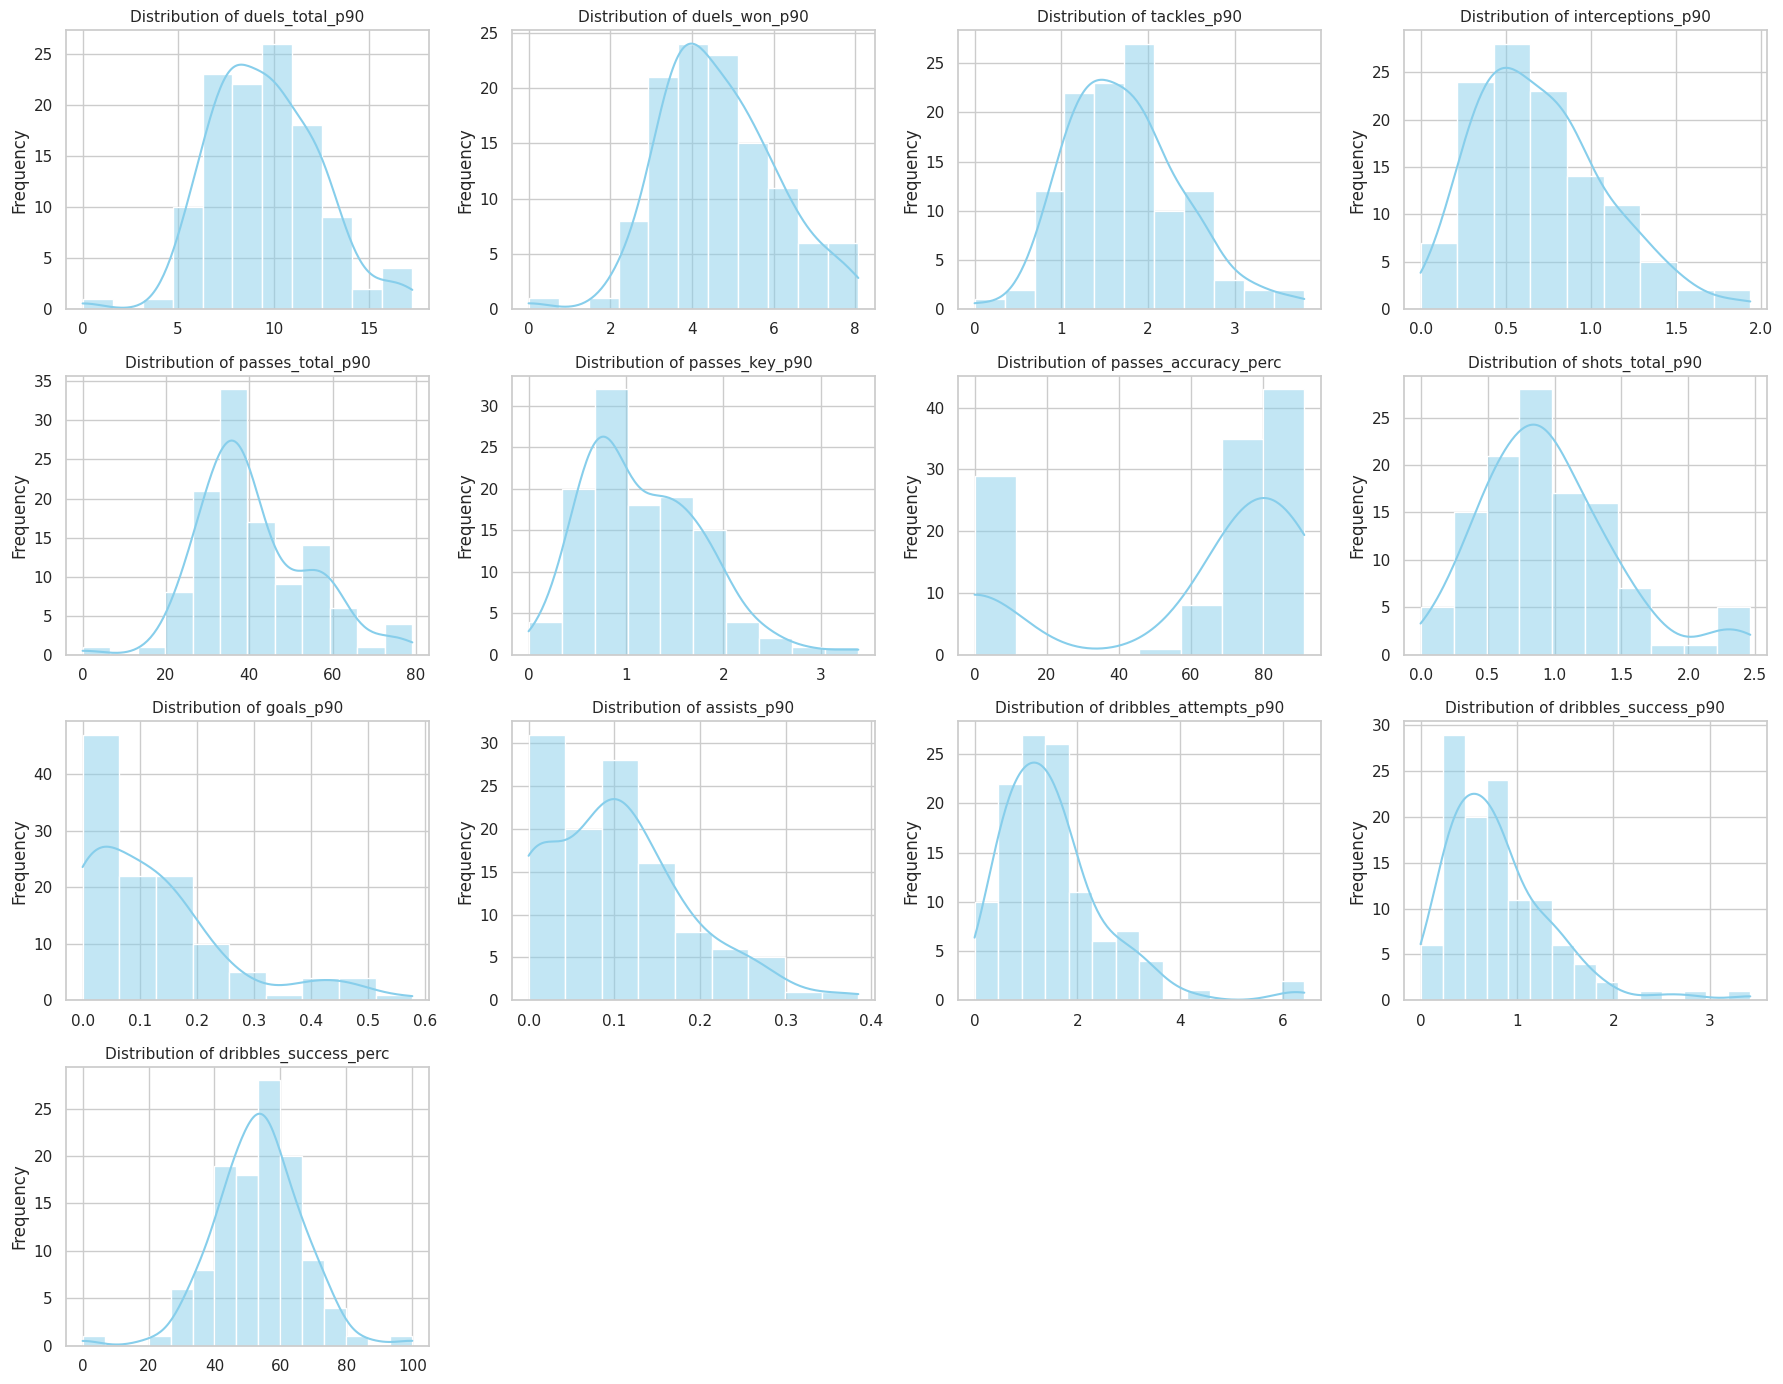

✅ Distribution plots for key midfielder metrics generated.


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Setting Seaborn style for consistent visuals
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (18, 14) # Default figure size, can be adjusted

# Load the preprocessed midfielders dataset
# This file should contain the per-90 normalized and renamed columns.
try:
    df_midfielders_renamed = pd.read_csv("seriea_midfielders_2023_24_preprocessed.csv")
    print("✅ Preprocessed Serie A midfielders dataset loaded successfully for EDA.")
except FileNotFoundError:
    print("❌ Error: 'seriea_midfielders_2023_24_preprocessed.csv' not found.")
    print("Please ensure the file exists (it should be generated by the previous preprocessing step).")
    exit()
except Exception as e:
    print(f"❌ An unexpected error occurred during file loading: {e}")
    exit()

# Selecting key per-90 and percentage features for tactical role analysis for midfielders.
# These column names match the ones defined in the 'EDA: Variable Classification & Dataset Overview - Serie A Midfielders'
# Based on descriptive statistics showing zero values, 'shots_on_target_p90',
# 'shots_on_target_perc', and 'touches_total_p90' are excluded as they provide no variance.
key_features_midfielders = [
    'duels_total_p90',
    'duels_won_p90',
    'tackles_p90',
    'interceptions_p90',
    'passes_total_p90',
    'passes_key_p90',
    'passes_accuracy_perc',
    'shots_total_p90',
    'goals_p90',
    'assists_p90',
    'dribbles_attempts_p90',
    'dribbles_success_p90',
    'dribbles_success_perc'
    # 'shots_on_target_p90', # Excluded due to consistently zero values in Serie A data
    # 'shots_on_target_perc', # Excluded due to consistently zero values in Serie A data
    # 'touches_total_p90' # Excluded due to consistently zero values in Serie A data
]

# Determine grid size dynamically based on the number of features
num_features = len(key_features_midfielders)
ncols = 4 # Number of columns in the subplot grid
nrows = (num_features + ncols - 1) // ncols # Calculate rows needed

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols * 4.5, nrows * 3.5))
axes = axes.flatten() # Flatten the 2D array of axes for easy iteration

# Plotting histograms with KDE overlays for each selected metric
for i, feature in enumerate(key_features_midfielders):
    if feature in df_midfielders_renamed.columns: # Check if the column exists in the DataFrame
        sns.histplot(data=df_midfielders_renamed, x=feature, kde=True, ax=axes[i], color='skyblue')
        axes[i].set_title(f"Distribution of {feature}", fontsize=11)
        axes[i].set_xlabel("") # Remove x-label to prevent overlap
        axes[i].set_ylabel("Frequency")
    else:
        print(f"Warning: Feature '{feature}' not found in the DataFrame. Skipping plot.")
        fig.delaxes(axes[i]) # Remove axis if feature is not present

# Removing any unused subplot axes (if num_features is not a perfect multiple of ncols)
for j in range(num_features, len(axes)):
    fig.delaxes(axes[j])

# Optimizing spacing between plots
plt.tight_layout()
plt.show()

print("✅ Distribution plots for key midfielder metrics generated.")


#Key Takeaways from the Distribution Plots – Serie A Midfielders


These visualizations provide insights into how the filtered group of Serie A midfielders operate across the pitch, highlighting their contributions in defending, ball circulation, progression, and attacking output.

**Defensive Actions**

*   **duels\_total\_p90 and duels\_won\_p90:** These distributions appear somewhat right-skewed, indicating that while most midfielders engage in a moderate number of defensive actions, there's a smaller group of players who are significantly more active defensively. This suggests distinct roles within the midfield in terms of defensive contribution.
*   **tackles\_p90 and interceptions\_p90:** These distributions show variations in defensive contribution through direct action and anticipation. Most Serie A midfielders perform a relatively low number of tackles and interceptions per 90. However, the distributions show tails extending to higher values, identifying players who are more proactive in regaining possession through tackles and reading the game for interceptions.

**Ball Circulation and Volume**

*   **passes\_total\_p90:** This metric shows a wide range of involvement in ball circulation. While there's a concentration of players with moderate passing volumes, some midfielders register very high numbers of passes per 90, indicating roles centered around controlling possession and distributing the ball frequently. The distribution appears somewhat normally distributed with a slight right skew.
*   **passes\_key\_p90:** The distribution for key passes is heavily skewed towards lower values, with most midfielders creating a small number of key passes per 90. A few players stand out with significantly higher key pass volumes, highlighting their role as primary creative outlets.
*   **passes\_accuracy\_perc:** The distribution of passing accuracy appears somewhat left-skewed, with a cluster of players having higher passing accuracy. This indicates that a good portion of midfielders maintain relatively high passing completion rates, although there's still a range of accuracy levels.

**Attacking Contribution**

*   **shots\_total\_p90 and goals\_p90:** These attacking metrics are heavily skewed towards zero, reflecting that scoring and shooting are not primary responsibilities for the majority of midfielders. However, the presence of a few players with notably higher values in these areas points to midfielders who contribute more significantly in the final third.
*   **assists\_p90:** Similar to goals and shots, assists are also heavily skewed towards zero. This highlights the players who are key creators of scoring opportunities for their teammates.

**Ball Progression and Carrying**

*   **dribbles\_attempts\_p90 and dribbles\_success\_p90:** These distributions are right-skewed, showing that while many midfielders attempt and complete some dribbles, a smaller group are frequent and successful ball carriers, indicating roles that involve progressing the ball through individual skill.
*   **dribbles\_success\_perc:** This metric's distribution shows a range of success rates, indicating that players who attempt dribbles have varying levels of effectiveness in completing them.

These distributions collectively paint a picture of the multifaceted nature of midfield roles in Serie A, with players specializing in different aspects of the game, from defense and ball winning to creative passing and dribbling.

I am creating a heatmap to visualize correlations between tactical features

-This helps identify which stats tend to move together and which ones are independent

-Useful to understand potential clusters and avoid feature redundancy

✅ Preprocessed Serie A midfielders dataset loaded successfully for correlation heatmap.


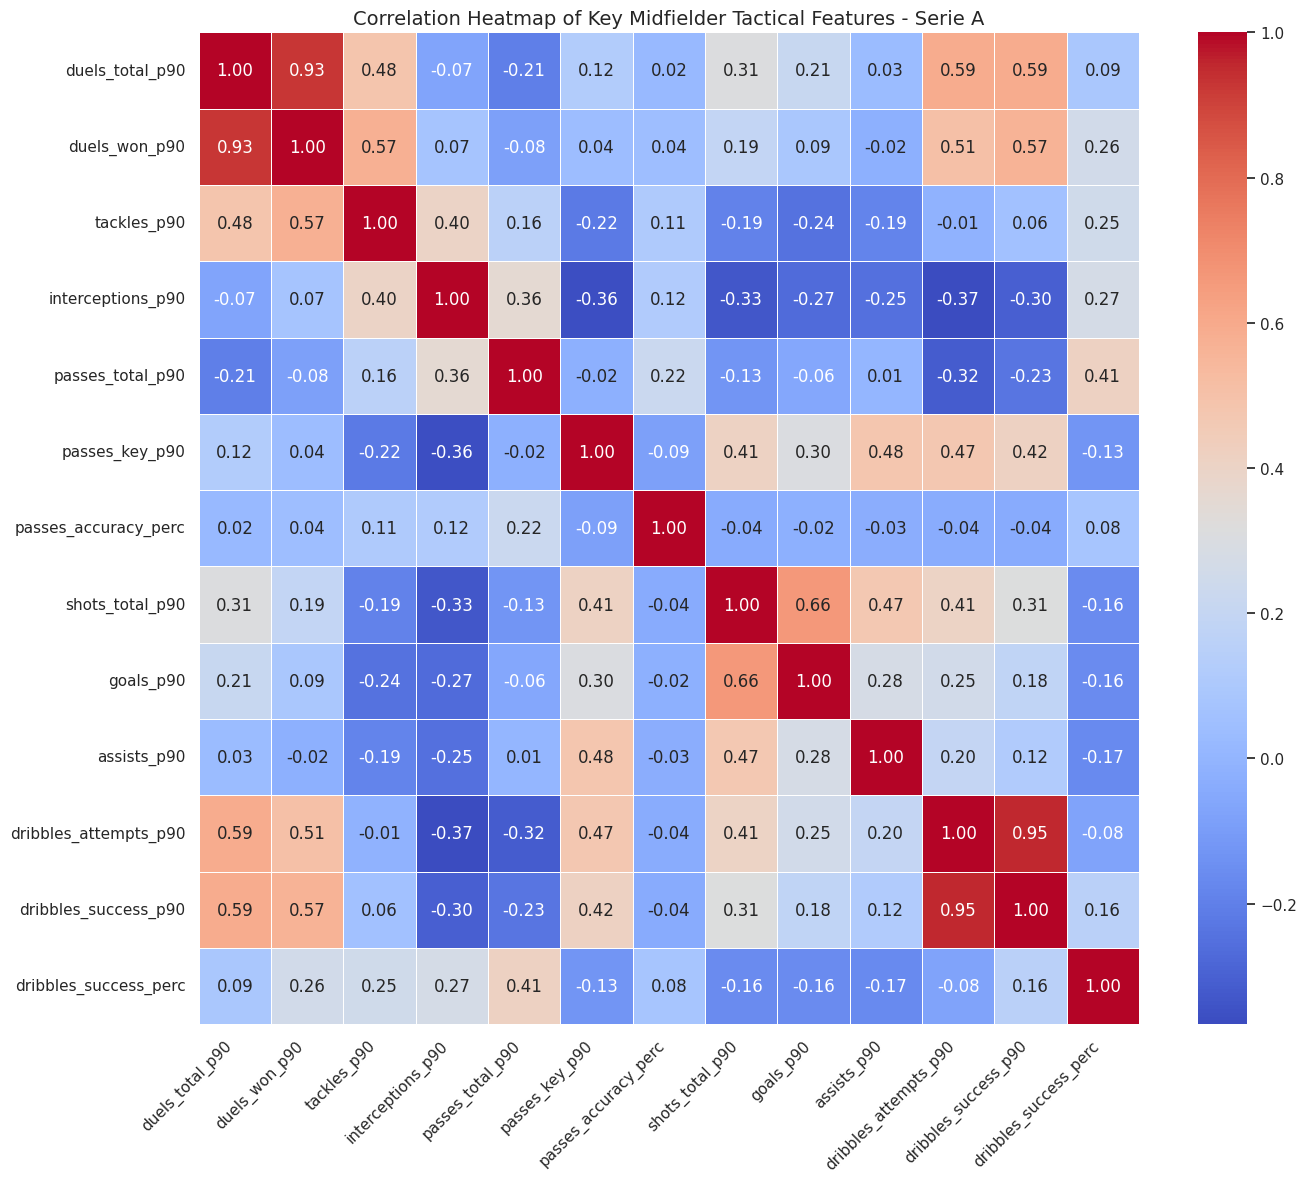


✅ Correlation heatmap generated for key midfielder metrics.


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Setting Seaborn style for consistent visuals
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 10) # Adjust figure size for heatmap

# Load the preprocessed midfielders dataset
# This file should contain the per-90 normalized and renamed columns.
try:
    df_midfielders_renamed = pd.read_csv("seriea_midfielders_2023_24_preprocessed.csv")
    print("✅ Preprocessed Serie A midfielders dataset loaded successfully for correlation heatmap.")
except FileNotFoundError:
    print("❌ Error: 'seriea_midfielders_2023_24_preprocessed.csv' not found.")
    print("Please ensure the file exists (it should be generated by the previous preprocessing step).")
    exit()
except Exception as e:
    print(f"❌ An unexpected error occurred during file loading: {e}")
    exit()

# Select the key per-90 and percentage features used in the distribution plots.
# Excluded 'shots_on_target_p90', 'shots_on_target_perc', and 'touches_total_p90' due to zero values.
key_features_midfielders = [
    'duels_total_p90',
    'duels_won_p90',
    'tackles_p90',
    'interceptions_p90',
    'passes_total_p90',
    'passes_key_p90',
    'passes_accuracy_perc',
    'shots_total_p90',
    'goals_p90',
    'assists_p90',
    'dribbles_attempts_p90',
    'dribbles_success_p90',
    'dribbles_success_perc',
]

# Create a DataFrame with only the selected key features
df_features_for_clustering = df_midfielders_renamed[key_features_midfielders].copy()

# Calculate the correlation matrix
correlation_matrix = df_features_for_clustering.corr()

# Plot the heatmap
plt.figure(figsize=(14, 12)) # Adjust figure size for heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Heatmap of Key Midfielder Tactical Features - Serie A", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

print("\n✅ Correlation heatmap generated for key midfielder metrics.")


# Interpretation of the Correlation Heatmap – Serie A Midfielders

The heatmap visualizes the pairwise correlations between the selected per-90 and percentage metrics for Serie A midfielders. The values range from -1 (perfect negative correlation) to +1 (perfect positive correlation), with 0 indicating no correlation.

Here are some key observations:

**Strong Positive Correlations:**

*   **duels\_total\_p90 and duels\_won\_p90:** As expected, there is a very strong positive correlation (around 0.93) between the total number of duels a player is involved in and the number of duels they win. This suggests that players who engage in more duels also tend to win a proportional number of them.
*   **dribbles\_attempts\_p90 and dribbles\_success\_p90:** There is a very strong positive correlation (around 0.95) between the number of dribble attempts and successful dribbles. This indicates that players who attempt more dribbles also tend to complete more of them.
*   **shots\_total\_p90 and goals\_p90:** There is a strong positive correlation (around 0.66) between the total shots taken and the goals scored. This is intuitive, as taking more shots generally leads to scoring more goals.
*   **passes\_key\_p90 and assists\_p90:** There is a strong positive correlation (around 0.48) between key passes and assists, highlighting that players who create more chances (key passes) are also more likely to register assists.

**Moderate Positive Correlations:**

*   **tackles\_p90 and interceptions\_p90:** There is a moderate positive correlation (around 0.40) between tackles and interceptions, suggesting that players who are active in one area of defensive action also tend to be active in the other.
*   **duels\_won\_p90 and tackles\_p90:** A moderate positive correlation (around 0.57) exists, indicating that winning duels is related to making tackles.
*   **passes\_total\_p90 and passes\_accuracy\_perc:** There is a moderate positive correlation (around 0.22) between the total number of passes and passing accuracy.

**Weak or Negative Correlations:**

*   Many metrics show weak or near-zero correlations, indicating that they measure relatively independent aspects of a midfielder's game. For example, passing volume and accuracy don't have a very strong relationship with defensive actions.
*   Some defensive metrics (`tackles_p90`, `interceptions_p90`) show weak negative correlations with attacking metrics (`passes_key_p90`, `shots_total_p90`, `goals_p90`, `assists_p90`). This might suggest a slight trade-off where players focused heavily on defensive duties might have less involvement in direct attacking output, and vice-versa, though the correlations are not strong enough to draw firm conclusions.

Overall, the heatmap confirms expected relationships between similar types of metrics (e.g., different duel stats, different dribble stats) and highlights the relative independence of other metrics, which is valuable for identifying diverse player profiles during clustering.

I am plotting boxplots to detect outliers and visualize distribution spread.
This helps identify which players (or roles) stand out significantly from the average behavior.

✅ Preprocessed Serie A midfielders dataset loaded successfully for boxplot analysis.


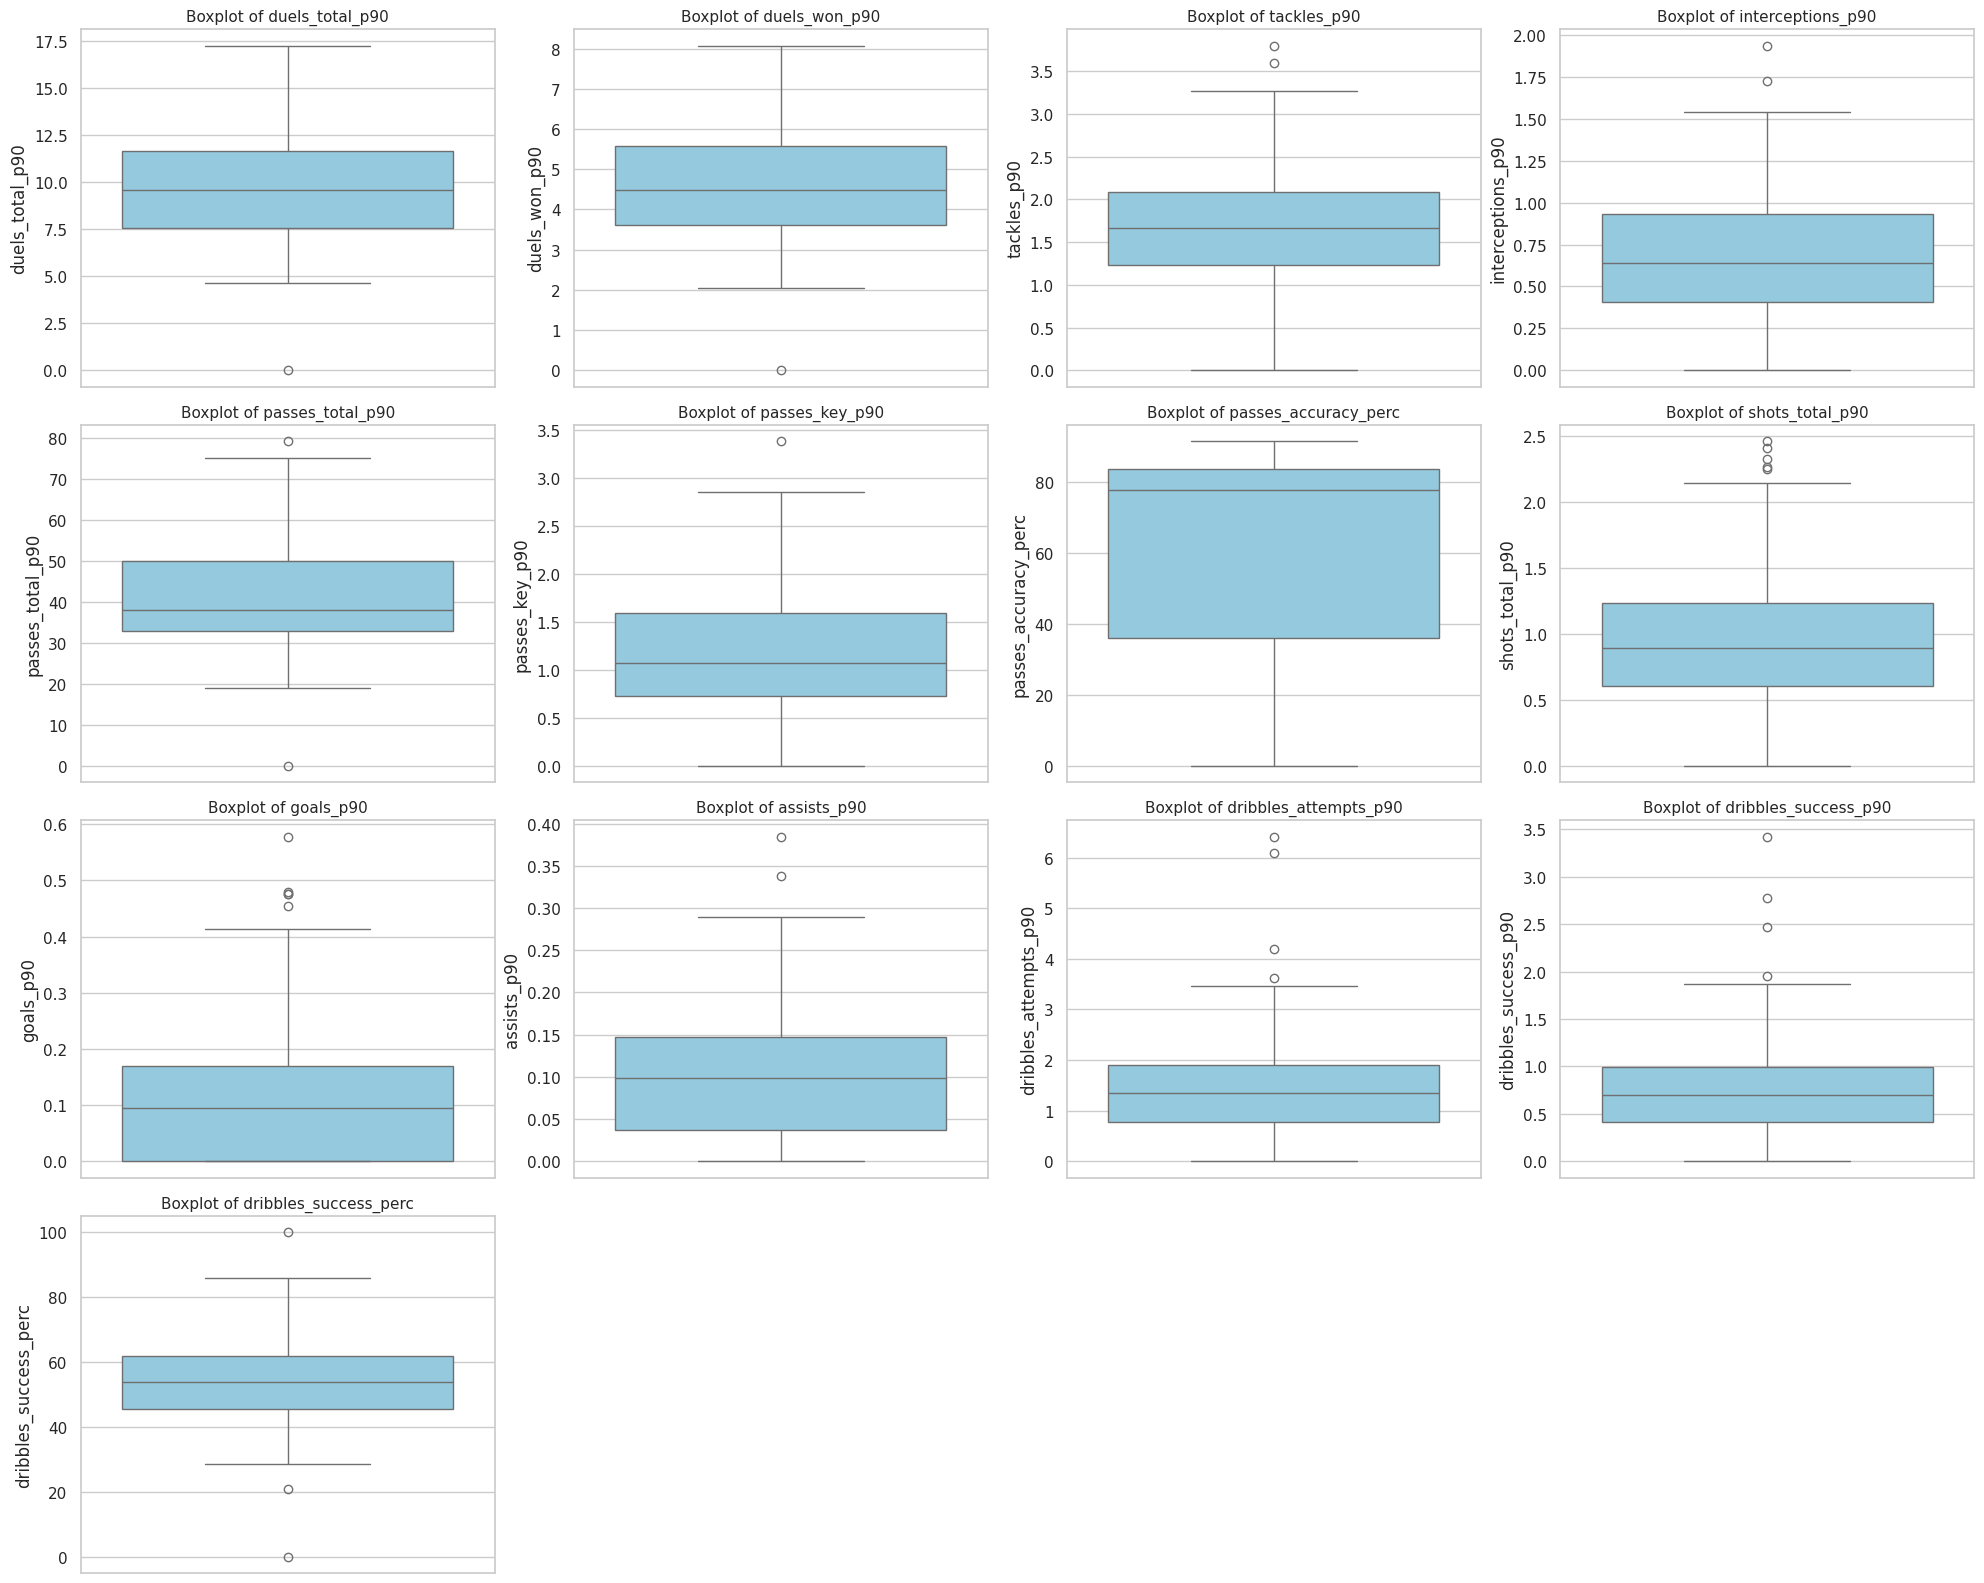

✅ Boxplots for key midfielder metrics generated.


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Setting Seaborn style for consistent visuals
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (18, 14) # Default figure size, can be adjusted

# Load the preprocessed midfielders dataset
# This file should contain the per-90 normalized and renamed columns.
try:
    df_midfielders_renamed = pd.read_csv("seriea_midfielders_2023_24_preprocessed.csv")
    print("✅ Preprocessed Serie A midfielders dataset loaded successfully for boxplot analysis.")
except FileNotFoundError:
    print("❌ Error: 'seriea_midfielders_2023_24_preprocessed.csv' not found.")
    print("Please ensure the file exists (it should be generated by the previous preprocessing step).")
    exit()
except Exception as e:
    print(f"❌ An unexpected error occurred during file loading: {e}")
    exit()

# Select the key per-90 and percentage features for tactical role analysis for midfielders.
# These are the same features used for the distribution plots and heatmap.
# Excluded 'shots_on_target_p90', 'shots_on_target_perc', and 'touches_total_p90' due to consistently zero values.
key_features_midfielders = [
    'duels_total_p90',
    'duels_won_p90',
    'tackles_p90',
    'interceptions_p90',
    'passes_total_p90',
    'passes_key_p90',
    'passes_accuracy_perc',
    'shots_total_p90',
    'goals_p90',
    'assists_p90',
    'dribbles_attempts_p90',
    'dribbles_success_p90',
    'dribbles_success_perc',
]

# Determine grid size dynamically based on the number of features
num_features = len(key_features_midfielders)
ncols = 4 # Number of columns in the subplot grid
nrows = (num_features + ncols - 1) // ncols # Calculate rows needed

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols * 5, nrows * 4)) # Adjusted figsize for boxplots
axes = axes.flatten() # Flatten the 2D array of axes for easy iteration

# Plotting boxplots for each selected metric
for i, feature in enumerate(key_features_midfielders):
    if feature in df_midfielders_renamed.columns: # Check if the column exists in the DataFrame
        sns.boxplot(data=df_midfielders_renamed, y=feature, ax=axes[i], color='skyblue') # Use y for vertical boxplots
        axes[i].set_title(f"Boxplot of {feature}", fontsize=11)
        axes[i].set_ylabel(feature) # Set y-label to the feature name
        axes[i].set_xlabel("") # Remove x-label for clarity in vertical boxplots
    else:
        print(f"Warning: Feature '{feature}' not found in the DataFrame. Skipping plot.")
        fig.delaxes(axes[i]) # Remove axis if feature is not present

# Removing any unused subplot axes (if num_features is not a perfect multiple of ncols)
for j in range(num_features, len(axes)):
    fig.delaxes(axes[j])

# Optimizing spacing between plots
plt.tight_layout()
plt.show()

print("✅ Boxplots for key midfielder metrics generated.")


# Interpretation of Boxplots – Serie A Midfielders

The boxplots visualize the distribution of each metric, showing the median (line in the box), the interquartile range (the box), and potential outliers (individual points).

Here's what we can observe:

*   **Defensive Metrics (duels\_total\_p90, duels\_won\_p90, tackles\_p90, interceptions\_p90):** These boxplots show a range of values, with some outliers indicating players who perform significantly more defensive actions than the median. The boxes and whiskers suggest that while there's a core group of midfielders with similar defensive output, there are also players who specialize more heavily in defensive contributions.
*   **Ball Circulation/Volume (passes\_total\_p90, passes\_key\_p90):** The boxplot for `passes_total_p90` shows a relatively wide spread, with the median around the middle of the range. There are outliers on the higher end, representing midfielders with very high passing volumes. `passes_key_p90` is heavily skewed towards lower values, with many players clustered near zero and several outliers indicating players who make a significantly higher number of key passes.
*   **Passing Accuracy (passes\_accuracy\_perc):** The boxplot for `passes_accuracy_perc` shows that the majority of players have a relatively high passing accuracy, with the median in the upper half of the range. There are some outliers on the lower end, indicating players with lower passing completion rates.
*   **Attacking Contribution (shots\_total\_p90, goals\_p90, assists\_p90):** These boxplots are heavily skewed towards zero, with the boxes and whiskers concentrated at the lower end of the scale. The presence of numerous outliers on the higher end for all three metrics highlights players who are significantly more involved in attacking actions (shooting, scoring, assisting) than the typical midfielder.
*   **Ball Progression/Carrying (dribbles\_attempts\_p90, dribbles\_success\_p90, dribbles\_success\_perc):** `dribbles_attempts_p90` and `dribbles_success_p90` show right-skewness with outliers, indicating that while most players attempt and complete some dribbles, a few players are standout dribblers. `dribbles_success_perc` shows a broader spread of success rates.

In summary, the boxplots effectively highlight the spread and central tendency of each metric and clearly identify outliers who deviate significantly from the typical midfielder's performance in Serie A. These outliers represent players with unique tactical profiles and will be interesting to analyze further in the clustering process.

#3.1 Data Cleaning-SERIE A MIDFIELDERS

This part ensures my dataset is clean, consistent, and ready for clustering. I’ll go through key checks.


In [16]:
import pandas as pd

# Load the preprocessed midfielders dataset
try:
    df_midfielders_renamed = pd.read_csv("seriea_midfielders_2023_24_preprocessed.csv")
    print("✅ Preprocessed Serie A midfielders dataset loaded successfully for data type check.")
except FileNotFoundError:
    print("❌ Error: 'seriea_midfielders_2023_24_preprocessed.csv' not found.")
    print("Please ensure the file exists (it should be generated by the 'Normalize and Rename Serie A Midfielders Data' step).")
    exit()
except Exception as e:
    print(f"❌ An unexpected error occurred during file loading: {e}")
    exit()

# Checking data types to make sure all features are interpreted correctly
# Using df_midfielders_renamed, which is the final preprocessed DataFrame
print("\nData types of the preprocessed Serie A midfielders dataset:")
print(df_midfielders_renamed.dtypes)


✅ Preprocessed Serie A midfielders dataset loaded successfully for data type check.

Data types of the preprocessed Serie A midfielders dataset:
name                        object
team                        object
position                    object
minutes                    float64
duels_total_api            float64
duels_won_api              float64
goals_total_api            float64
shots_total_api            float64
shots_on_target_api          int64
assists_total_api          float64
dribbles_attempts_api      float64
dribbles_success_api       float64
touches_total_api            int64
passes_key_api             float64
passes_total_api           float64
passes_accuracy_perc       float64
tackles_total_api          float64
interceptions_total_api    float64
shots_on_target_perc       float64
dribbles_success_perc      float64
name_clean                  object
team_clean                  object
duels_total_p90            float64
duels_won_p90              float64
goals_p90      

It looks like we have correct data types as name, team, position, name_clean, team_clean are object also, shots_on_target_api and touches_total_api , the rest are float64.

In [17]:
import pandas as pd

# Load the preprocessed midfielders dataset
try:
    df_midfielders_renamed = pd.read_csv("seriea_midfielders_2023_24_preprocessed.csv")
    print("✅ Preprocessed Serie A midfielders dataset loaded successfully for duplicate check.")
except FileNotFoundError:
    print("❌ Error: 'seriea_midfielders_2023_24_preprocessed.csv' not found.")
    print("Please ensure the file exists (it should be generated by the previous preprocessing step).")
    exit()
except Exception as e:
    print(f"❌ An unexpected error occurred during file loading: {e}")
    exit()

# Checking for duplicated rows in the preprocessed DataFrame
# Using df_midfielders_renamed, which is the final preprocessed DataFrame
num_duplicates = df_midfielders_renamed.duplicated().sum()

print(f"\nNumber of duplicated rows in the preprocessed Serie A midfielders dataset: {num_duplicates}")

if num_duplicates == 0:
    print("✅ No duplicate rows found. The dataset is ready for further analysis.")
else:
    print("⚠️ Duplicate rows found. Consider investigating and removing them if they are unintended.")
    # Optional: Display duplicated rows if any
    # print("\nDuplicated Rows:")
    # print(df_midfielders_renamed[df_midfielders_renamed.duplicated(keep=False)].to_string())


✅ Preprocessed Serie A midfielders dataset loaded successfully for duplicate check.

Number of duplicated rows in the preprocessed Serie A midfielders dataset: 0
✅ No duplicate rows found. The dataset is ready for further analysis.


0 duplicates.

In [18]:
import pandas as pd

# Load the preprocessed midfielders dataset
try:
    df_midfielders_renamed = pd.read_csv("seriea_midfielders_2023_24_preprocessed.csv")
    print("✅ Preprocessed Serie A midfielders dataset loaded successfully for unique value check.")
except FileNotFoundError:
    print("❌ Error: 'seriea_midfielders_2023_24_preprocessed.csv' not found.")
    print("Please ensure the file exists (it should be generated by the previous preprocessing step).")
    exit()
except Exception as e:
    print(f"❌ An unexpected error occurred during file loading: {e}")
    exit()

# Checking unique values in player name and team from the preprocessed DataFrame
# Using df_midfielders_renamed, which contains the final set of players and renamed columns.
print("\nUnique player names in the preprocessed Serie A midfielders dataset:", df_midfielders_renamed['name'].nunique())
print("Unique teams in the preprocessed Serie A midfielders dataset:", df_midfielders_renamed['team'].nunique())


✅ Preprocessed Serie A midfielders dataset loaded successfully for unique value check.

Unique player names in the preprocessed Serie A midfielders dataset: 116
Unique teams in the preprocessed Serie A midfielders dataset: 20


In [19]:
import pandas as pd

# Load the preprocessed midfielders dataset
try:
    df_midfielders_renamed = pd.read_csv("seriea_midfielders_2023_24_preprocessed.csv")
    print("✅ Preprocessed Serie A midfielders dataset loaded successfully for final missing value check.")
except FileNotFoundError:
    print("❌ Error: 'seriea_midfielders_2023_24_preprocessed.csv' not found.")
    print("Please ensure the file exists (it should be generated by the previous preprocessing step).")
    exit()
except Exception as e:
    print(f"❌ An unexpected error occurred during file loading: {e}")
    exit()

# Checking for missing values in the preprocessed dataset
# Using df_midfielders_renamed, which is the final preprocessed DataFrame
missing_values_final = df_midfielders_renamed.isnull().sum()
missing_values_summary = missing_values_final[missing_values_final > 0].sort_values(ascending=False)

if missing_values_summary.empty:
    print("\n✅ No missing values found in the preprocessed Serie A midfielders dataset. Data is clean!")
else:
    print("\n⚠️ Missing values found in the preprocessed Serie A midfielders dataset (should be 0 after cleaning):")
    print(missing_values_summary.to_string())
    print("\nThis indicates an issue in previous cleaning steps. Please review and re-run them.")


✅ Preprocessed Serie A midfielders dataset loaded successfully for final missing value check.

✅ No missing values found in the preprocessed Serie A midfielders dataset. Data is clean!


In [21]:
import pandas as pd

# Load the preprocessed Serie A midfielders dataset, which contains all per-90 and renamed metrics.
# This is the source for selecting the features that will be used for clustering.
try:
    df_midfielders_preprocessed = pd.read_csv("seriea_midfielders_2023_24_preprocessed.csv")
    print("✅ Preprocessed Serie A midfielders dataset loaded successfully for feature selection.")
except FileNotFoundError:
    print("❌ Error: 'seriea_midfielders_2023_24_preprocessed.csv' not found.")
    print("Please ensure this file has been generated by the 'Normalize and Rename Serie A Midfielders Data' step.")
    exit()
except Exception as e:
    print(f"❌ An unexpected error occurred during file loading: {e}")
    exit()

# Define the list of numerical features to be used for clustering for midfielders.
# These are the per-90 and percentage metrics identified as relevant for tactical role analysis.
# Based on the descriptive statistics output for Serie A, 'shots_on_target_p90',
# 'shots_on_target_perc', and 'touches_total_p90' are excluded due to consistently zero values.
selected_metrics_for_clustering = [
    'duels_total_p90',
    'duels_won_p90',
    'tackles_p90',
    'interceptions_p90',
    'passes_total_p90',
    'passes_key_p90',
    'passes_accuracy_perc',
    'shots_total_p90',
    'goals_p90',
    'assists_p90',
    'dribbles_attempts_p90',
    'dribbles_success_p90',
    'dribbles_success_perc'
]

# Filter to existing columns to avoid key errors
existing_selected_metrics = [col for col in selected_metrics_for_clustering if col in df_midfielders_preprocessed.columns]

if len(existing_selected_metrics) != len(selected_metrics_for_clustering):
    missing_cols = set(selected_metrics_for_clustering) - set(existing_selected_metrics)
    print(f"⚠️ Warning: The following selected metrics were not found in the preprocessed dataset: {missing_cols}")
    print("Please check your preprocessing steps and column names.")

df_features_for_clustering = df_midfielders_preprocessed[existing_selected_metrics].copy()
print(f"✅ Selected {len(existing_selected_metrics)} features for clustering.")

# Save the dataset with only the selected metrics for clustering
output_filename = "seriea_midfielders_2023_24_selected_metrics.csv"
df_features_for_clustering.to_csv(output_filename, index=False)
print(f"✅ Selected features dataset saved as: {output_filename}")

# Display summary information about the newly created dataset for clustering
print("\n--- Summary of Features for Clustering ---")
print(f"Final dataset shape: {df_features_for_clustering.shape}")
print("\nColumn types:")
print(df_features_for_clustering.dtypes.value_counts())
print("\nFirst 5 rows of the features for clustering:")
print(df_features_for_clustering.head().to_string())


✅ Preprocessed Serie A midfielders dataset loaded successfully for feature selection.
✅ Selected 13 features for clustering.
✅ Selected features dataset saved as: seriea_midfielders_2023_24_selected_metrics.csv

--- Summary of Features for Clustering ---
Final dataset shape: (116, 13)

Column types:
float64    13
Name: count, dtype: int64

First 5 rows of the features for clustering:
   duels_total_p90  duels_won_p90  tackles_p90  interceptions_p90  passes_total_p90  passes_key_p90  passes_accuracy_perc  shots_total_p90  goals_p90  assists_p90  dribbles_attempts_p90  dribbles_success_p90  dribbles_success_perc
0         4.664734       2.479159     0.587169           0.228344         37.220007        1.957231                  72.4         1.402682   0.195723     0.195723               1.174339              0.489308              41.666667
1         8.114144       3.796526     2.531017           0.521092         47.568238        1.637717                  82.1         0.074442   0.000000  

#4.1 FEATURE ENGINEERING- SERIE A MIDFIELDERS

#One-hot encoding

This step is crucial for preparing the 'team' categorical variable for machine learning. By converting team names into a numerical, binary format through one-hot encoding, I ensure that the clustering algorithm can properly interpret and utilize team affiliation as a factor in grouping players, maintaining consistency with the approach taken for other positions like midfielders.

In [22]:
import pandas as pd

# Load the preprocessed midfielders dataset, which still contains the original 'team' column.
# This is the starting point for one-hot encoding.
try:
    df_midfielders_preprocessed = pd.read_csv("seriea_midfielders_2023_24_preprocessed.csv")
    print("✅ Preprocessed Serie A midfielders dataset loaded successfully for one-hot encoding.")
except FileNotFoundError:
    print("❌ Error: 'seriea_midfielders_2023_24_preprocessed.csv' not found.")
    print("Please ensure this file has been generated by the 'Normalize and Rename Serie A Midfielders Data' step.")
    exit()
except Exception as e:
    print(f"❌ An unexpected error occurred during file loading: {e}")
    exit()

# Perform one-hot encoding on the 'team' column.
# 'drop_first=True' is used to avoid multicollinearity.
# The new columns will be named 'team_TeamName'.
df_midfielders_preprocessed_encoded_team = pd.get_dummies(df_midfielders_preprocessed, columns=['team'], drop_first=True)
print("✅ 'team' column successfully one-hot encoded.")

# This checks if the original 'team' column was successfully removed by get_dummies.
if 'team' in df_midfielders_preprocessed_encoded_team.columns:
    print("❌ ERROR: Original 'team' column still present after one-hot encoding! This should not happen.")
    print("Please investigate why pd.get_dummies did not remove the original 'team' column.")
    # If the original 'team' column persists, explicitly drop it here to proceed.
    df_midfielders_preprocessed_encoded_team.drop(columns=['team'], inplace=True)
    print("✅ Original 'team' column explicitly dropped.")
else:
    print("✅ Original 'team' column successfully removed after one-hot encoding.")

# Save the DataFrame with the new encoded team columns to a new CSV file.
# This file will then be used as input for the 'Feature Selection for Clustering' step.
output_filename = "seriea_midfielders_2023_24_preprocessed_encoded_team.csv"
df_midfielders_preprocessed_encoded_team.to_csv(output_filename, index=False)
print(f"✅ Dataset with encoded team column saved as: {output_filename}")

# Display the first few rows and columns to verify
print("\nFirst 5 rows of the dataset after one-hot encoding 'team':")
print(df_midfielders_preprocessed_encoded_team.head().to_string())
print("\nColumns after one-hot encoding 'team':")
print(df_midfielders_preprocessed_encoded_team.columns.tolist())


✅ Preprocessed Serie A midfielders dataset loaded successfully for one-hot encoding.
✅ 'team' column successfully one-hot encoded.
✅ Original 'team' column successfully removed after one-hot encoding.
✅ Dataset with encoded team column saved as: seriea_midfielders_2023_24_preprocessed_encoded_team.csv

First 5 rows of the dataset after one-hot encoding 'team':
             name    position  minutes  duels_total_api  duels_won_api  goals_total_api  shots_total_api  shots_on_target_api  assists_total_api  dribbles_attempts_api  dribbles_success_api  touches_total_api  passes_key_api  passes_total_api  passes_accuracy_perc  tackles_total_api  interceptions_total_api  shots_on_target_perc  dribbles_success_perc           name_clean   team_clean  duels_total_p90  duels_won_p90  goals_p90  shots_total_p90  shots_on_target_p90  assists_p90  dribbles_attempts_p90  dribbles_success_p90  touches_total_p90  passes_key_p90  passes_total_p90  tackles_p90  interceptions_p90  team_AS Roma  team_Atala

#4.2 Standard Scaling of Numerical Features

Before applying clustering, we need to make sure all numerical features contribute equally. Some metrics are much larger in range than others , which can distort clustering results. I solve this using StandardScaler, which transforms each feature to have:

    Mean = 0

    Standard deviation = 1

In [23]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the dataset containing the preprocessed data with one-hot encoded team columns.
# This is the input for the scaling process.
try:
    df_features_to_scale = pd.read_csv("seriea_midfielders_2023_24_preprocessed_encoded_team.csv")
    print("✅ Preprocessed Serie A midfielders dataset (with encoded teams) loaded successfully for scaling.")
except FileNotFoundError:
    print("❌ Error: 'seriea_midfielders_2023_24_preprocessed_encoded_team.csv' not found.")
    print("Please ensure this file has been generated by the 'Feature Engineering: One-Hot Encoding Team Column for Midfielders' step.")
    exit()
except Exception as e:
    print(f"❌ An unexpected error occurred during file loading: {e}")
    exit()

# Identify numerical columns to be scaled.
# This should include all per-90 metrics, percentage metrics, and one-hot encoded team columns.
# Exclude identifier columns like 'name', 'position', 'name_clean', 'team_clean', and 'minutes'
# as they are not features for clustering and should not be scaled.
# Also, explicitly exclude columns identified as having all zero values (or very low variance)
# as requested by the user, as these would not contribute meaningfully to clustering.
columns_to_exclude_from_scaling = [
    'name', 'position', 'minutes', 'name_clean', 'team_clean',
    'duels_total_api', 'duels_won_api', 'goals_total_api', 'shots_total_api',
    'shots_on_target_api', 'assists_total_api', 'dribbles_attempts_api',
    'dribbles_success_api', 'touches_total_api', 'passes_key_api', 'passes_total_api',
    'tackles_total_api', 'interceptions_total_api',
    'shots_on_target_perc',
    'shots_on_target_p90',
    'touches_total_p90'
]

# Filter out columns that don't exist in the DataFrame to prevent errors
existing_cols_to_exclude = [col for col in columns_to_exclude_from_scaling if col in df_features_to_scale.columns]

# Create a DataFrame containing only the features that need to be scaled.
df_numerical_features = df_features_to_scale.drop(columns=existing_cols_to_exclude, errors='ignore').copy()

# Initialize and apply StandardScaler
scaler = StandardScaler()
scaled_features_array = scaler.fit_transform(df_numerical_features)

# Convert scaled array to DataFrame with original column names
df_scaled_features = pd.DataFrame(scaled_features_array, columns=df_numerical_features.columns)
print("✅ Numerical features successfully scaled using StandardScaler.")

# Save the scaled dataset
output_filename = "seriea_midfielders_2023_24_scaled_metrics.csv"
df_scaled_features.to_csv(output_filename, index=False)
print(f"✅ Scaled features dataset saved as: {output_filename}")

# Display summary
print("\n--- Summary of Scaled Features for Midfielders ---")
print(f"Scaled dataset shape: {df_scaled_features.shape}")
print("\nColumn types (should all be float64):")
print(df_scaled_features.dtypes.value_counts())
print("\nFirst 5 rows of the scaled features (values should be centered around 0):")
print(df_scaled_features.head().to_string())


✅ Preprocessed Serie A midfielders dataset (with encoded teams) loaded successfully for scaling.
✅ Numerical features successfully scaled using StandardScaler.
✅ Scaled features dataset saved as: seriea_midfielders_2023_24_scaled_metrics.csv

--- Summary of Scaled Features for Midfielders ---
Scaled dataset shape: (116, 32)

Column types (should all be float64):
float64    32
Name: count, dtype: int64

First 5 rows of the scaled features (values should be centered around 0):
   passes_accuracy_perc  dribbles_success_perc  duels_total_p90  duels_won_p90  goals_p90  shots_total_p90  assists_p90  dribbles_attempts_p90  dribbles_success_p90  passes_key_p90  passes_total_p90  tackles_p90  interceptions_p90  team_AS Roma  team_Atalanta  team_Bologna  team_Cagliari  team_Empoli  team_Fiorentina  team_Frosinone  team_Genoa  team_Inter  team_Juventus  team_Lazio  team_Lecce  team_Monza  team_Napoli  team_Salernitana  team_Sassuolo  team_Torino  team_Udinese  team_Verona
0              0.371336 

In [24]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the dataset containing the preprocessed data with one-hot encoded team columns.
# This is the input for the scaling process.
try:
    df_features_to_scale = pd.read_csv("seriea_midfielders_2023_24_preprocessed_encoded_team.csv")
    print("✅ Preprocessed Serie A midfielders dataset (with encoded teams) loaded successfully for scaling.")
except FileNotFoundError:
    print("❌ Error: 'seriea_midfielders_2023_24_preprocessed_encoded_team.csv' not found.")
    print("Please ensure this file has been generated by the 'Feature Engineering: One-Hot Encoding Team Column for Midfielders' step.")
    exit()
except Exception as e:
    print(f"❌ An unexpected error occurred during file loading: {e}")
    exit()

# Identify numerical columns to be scaled.
# This should include all per-90 metrics, percentage metrics, and one-hot encoded team columns.
# Exclude identifier columns like 'name', 'position', 'name_clean', 'team_clean', and 'minutes'
# as they are not features for clustering and should not be scaled.
# Also, explicitly exclude columns identified as having all zero values (or very low variance)
# as requested by the user, as these would not contribute meaningfully to clustering.
columns_to_exclude_from_scaling = [
    'name', 'position', 'minutes', 'name_clean', 'team_clean',
    # Original API total columns are also excluded as we use their _p90 versions or percentages
    'duels_total_api', 'duels_won_api', 'goals_total_api', 'shots_total_api',
    'shots_on_target_api', 'assists_total_api', 'dribbles_attempts_api',
    'dribbles_success_api', 'touches_total_api', 'passes_key_api', 'passes_total_api',
    'tackles_total_api', 'interceptions_total_api',
    # NEW: Exclude columns with constant zero values (or very low variance) as identified in Serie A data
    'shots_on_target_perc',
    'shots_on_target_p90',
    'touches_total_p90'
]

# Filter out columns that don't exist in the DataFrame to prevent errors
existing_cols_to_exclude = [col for col in columns_to_exclude_from_scaling if col in df_features_to_scale.columns]

# Create a DataFrame containing only the features that need to be scaled.
# This will include all the per-90 metrics, percentage metrics, and one-hot encoded team columns,
# *excluding* the ones identified for removal.
df_numerical_features = df_features_to_scale.drop(columns=existing_cols_to_exclude, errors='ignore').copy()

# Initialize the StandardScaler.
# StandardScaler will transform the data such that each feature has a mean of 0 and a standard deviation of 1.
# This is crucial for distance-based clustering algorithms like K-Means.
scaler = StandardScaler()

# Fit the scaler to the data and transform it.
# The .fit_transform() method calculates the mean and standard deviation for each feature
# and then applies the transformation. The output is a NumPy array.
scaled_features_array = scaler.fit_transform(df_numerical_features)

# Convert the scaled NumPy array back into a Pandas DataFrame.
# It's important to retain the original column names for interpretability.
df_scaled_features = pd.DataFrame(scaled_features_array, columns=df_numerical_features.columns)
print("✅ Numerical features successfully scaled using StandardScaler.")

# Save the scaled features to a new CSV file.
# This file will be the direct input for the clustering algorithms.
output_filename = "seriea_midfielders_2023_24_scaled_metrics.csv"
df_scaled_features.to_csv(output_filename, index=False)
print(f"✅ Scaled features dataset saved as: {output_filename}")

# Display summary information about the scaled dataset.
print("\n--- Summary of Scaled Features for Midfielders ---")
print(f"Scaled dataset shape: {df_scaled_features.shape}")
print("\nColumn types (should all be float64):")
print(df_scaled_features.dtypes.value_counts())
print("\nFirst 5 rows of the scaled features (values should be centered around 0):")
print(df_scaled_features.head().to_string())


✅ Preprocessed Serie A midfielders dataset (with encoded teams) loaded successfully for scaling.
✅ Numerical features successfully scaled using StandardScaler.
✅ Scaled features dataset saved as: seriea_midfielders_2023_24_scaled_metrics.csv

--- Summary of Scaled Features for Midfielders ---
Scaled dataset shape: (116, 32)

Column types (should all be float64):
float64    32
Name: count, dtype: int64

First 5 rows of the scaled features (values should be centered around 0):
   passes_accuracy_perc  dribbles_success_perc  duels_total_p90  duels_won_p90  goals_p90  shots_total_p90  assists_p90  dribbles_attempts_p90  dribbles_success_p90  passes_key_p90  passes_total_p90  tackles_p90  interceptions_p90  team_AS Roma  team_Atalanta  team_Bologna  team_Cagliari  team_Empoli  team_Fiorentina  team_Frosinone  team_Genoa  team_Inter  team_Juventus  team_Lazio  team_Lecce  team_Monza  team_Napoli  team_Salernitana  team_Sassuolo  team_Torino  team_Udinese  team_Verona
0              0.371336 

#4.3 Final feature selection-SERIE A MIDFIELDERS

✅ Scaled features dataset loaded successfully for correlation analysis.


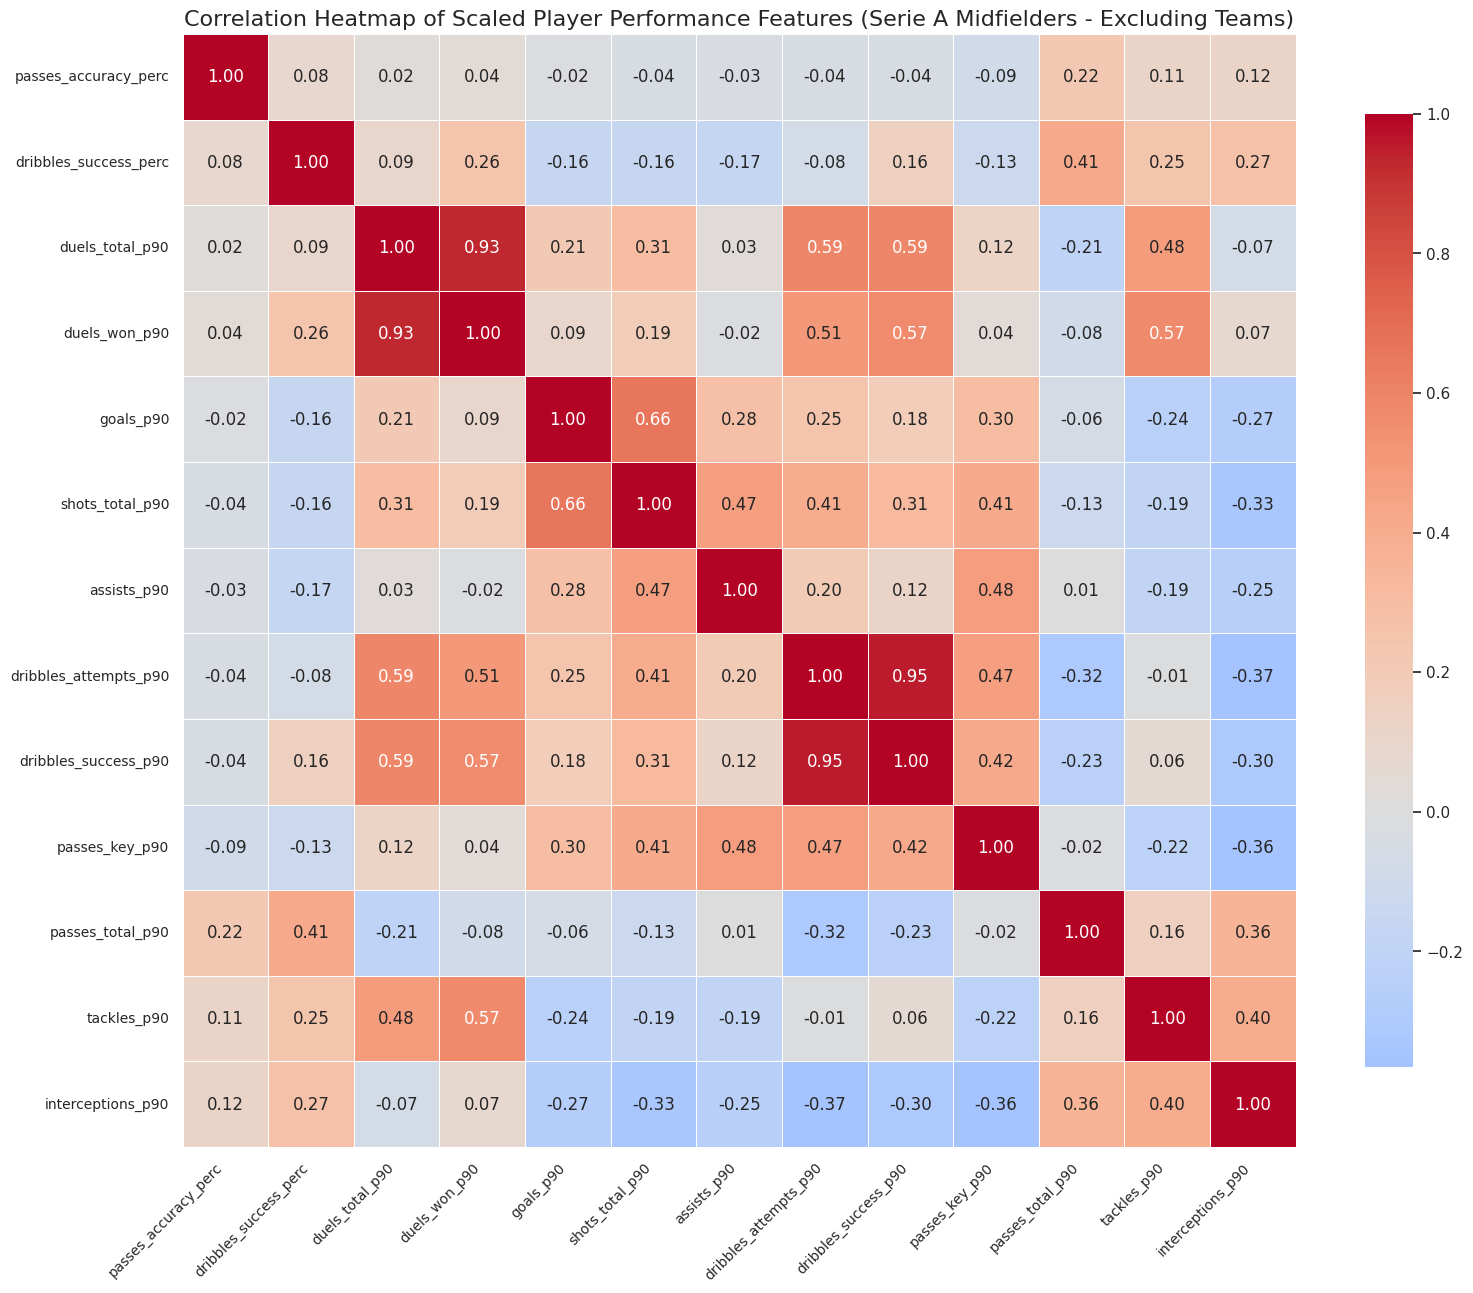

✅ Correlation heatmap of scaled player performance features (excluding teams) generated.


In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Explanation:
# This heatmap visualizes the correlations among the numerical features
# that have been selected and scaled for the clustering analysis.
# Analyzing these correlations helps identify highly redundant features
# before applying clustering algorithms, which can sometimes be sensitive
# to multicollinearity. It also provides insights into relationships
# between player metrics.
# Note: One-hot encoded team columns are excluded from this visualization
# to improve readability and focus on player performance metric correlations.

# Load the scaled features dataset.
# This file contains all the numerical metrics, including one-hot encoded team columns,
# that will be used as input for clustering.
try:
    df_scaled_features = pd.read_csv("seriea_midfielders_2023_24_scaled_metrics.csv")
    print("✅ Scaled features dataset loaded successfully for correlation analysis.")
except FileNotFoundError:
    print("❌ Error: 'seriea_midfielders_2023_24_scaled_metrics.csv' not found.")
    print("Please ensure this file has been generated by the 'Feature Scaling: Standardizing Numerical Metrics for Midfielders' step.")
    exit()
except Exception as e:
    print(f"❌ An unexpected error occurred during file loading: {e}")
    exit()

# Filter out the one-hot encoded 'team_' columns for this visualization.
# The actual clustering will still use all features, including team.
# This step is purely for visual clarity of the heatmap.
clustering_features_for_heatmap = [
    col for col in df_scaled_features.columns if not col.startswith('team_')
]

# Computing correlation matrix
# Using only the selected player performance features for the heatmap
corr_matrix = df_scaled_features[clustering_features_for_heatmap].corr()

# Plotting correlation heatmap
plt.figure(figsize=(16, 14)) # Adjusted figure size for better readability
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap='coolwarm',
    center=0,
    fmt=".2f",
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": .75} # Shrink color bar to fit better
)
plt.title("Correlation Heatmap of Scaled Player Performance Features (Serie A Midfielders - Excluding Teams)", fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=10) # Adjust rotation for better fit
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()
plt.show()

print("✅ Correlation heatmap of scaled player performance features (excluding teams) generated.")


# Explanation of Metric Selection Based on Correlation Heatmap (Midfielders)

The heatmap above reveals patterns of correlation between key scaled midfielder metrics. Based on these relationships, we can make informed selections to retain features that are informative, tactically relevant, and not overly redundant for clustering.

**Key Observations and Metric Selection Rationale:**

**Defensive Duels and Tackles:**

*   `duels_total_p90` and `duels_won_p90` are highly correlated (around 0.93).
*   `tackles_p90` and `interceptions_p90` show a moderate positive correlation (around 0.40).
*   `duels_won_p90` also correlates moderately with `tackles_p90` (around 0.57).

**Selection:**

We retain a set of these features to capture different aspects of defensive engagement and success (e.g., `duels_total_p90`, `duels_won_p90`, `tackles_p90`, `interceptions_p90`) as they represent distinct but related defensive actions. While `duels_total_p90` and `duels_won_p90` are highly correlated, retaining both can sometimes provide a slightly more nuanced view of duel effectiveness.

**Passing Volume and Accuracy:**

*   `passes_total_p90` shows low to moderate correlations with most defensive metrics.
*   `passes_key_p90` has low correlations with defensive metrics but moderate positive correlations with `shots_total_p90` (around 0.41) and `assists_p90` (around 0.48).
*   `passes_accuracy_perc` shows low correlations with `passes_total_p90` (around 0.22) and `passes_key_p90` (around -0.09).

**Selection:**

We retain features like `passes_total_p90` (volume), `passes_key_p90` (creativity), and `passes_accuracy_perc` (efficiency) as they represent different dimensions of a midfielder's passing game. Their relatively low correlations with each other (especially `passes_accuracy_perc`) and with defensive metrics indicate they provide unique information.

**Attacking Contribution:**

*   `shots_total_p90`, `goals_p90`, and `assists_p90` show positive correlations among themselves (e.g., `shots_total_p90` with `goals_p90` around 0.66, `shots_total_p90` with `assists_p90` around 0.47).

**Selection:**

We retain these attacking metrics as they are crucial for identifying midfielders who contribute significantly in the final third. While correlated, each represents a slightly different aspect of attacking output.

**Ball Progression and Carrying:**

*   `dribbles_attempts_p90` and `dribbles_success_p90` are highly correlated (around 0.95).
*   `dribbles_success_perc` shows lower correlations with attempt and success counts (around 0.16 and 0.08 respectively).

**Selection:**

We retain `dribbles_attempts_p90` or `dribbles_success_p90` (choosing one to avoid high redundancy, or potentially both if a nuanced view of volume vs. success is desired) and `dribbles_success_perc`. These capture both the volume and effectiveness of ball carrying.

**Overall Selection Strategy:**

The goal is to select a diverse set of metrics that cover the key tactical areas (defending, passing, attacking, ball carrying) without including overly redundant features. The correlation heatmap helps us identify these relationships. The final selection will include a balance of metrics representing these different facets of a midfielder's game, along with the one-hot encoded team features for team-specific influences on playing style.

#5.1 Preprocessing-PCA (Principal Component Analysis)- SERIE A MIDFIELDERS

✅ Scaled features dataset for Serie A midfielders loaded successfully for PCA.
✅ PCA performed for Serie A midfielders. Transformed data shape: (116, 32)


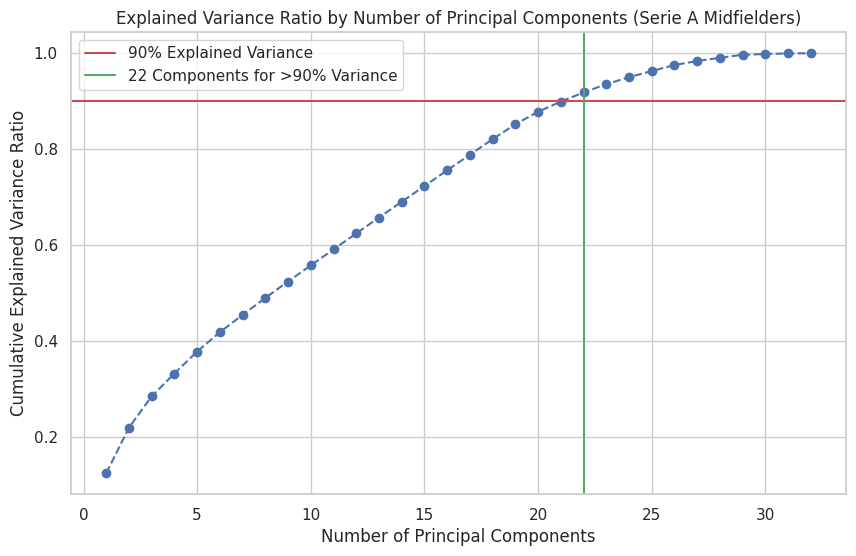

✅ Explained Variance Ratio plot for Serie A midfielders generated.

Explained Variance Ratio for each Principal Component (Serie A Midfielders):
PC1: 0.1247 (Cumulative: 0.1247)
PC2: 0.0951 (Cumulative: 0.2198)
PC3: 0.0654 (Cumulative: 0.2851)
PC4: 0.0474 (Cumulative: 0.3326)
PC5: 0.0458 (Cumulative: 0.3784)
PC6: 0.0403 (Cumulative: 0.4187)
PC7: 0.0361 (Cumulative: 0.4547)
PC8: 0.0353 (Cumulative: 0.4901)
PC9: 0.0343 (Cumulative: 0.5243)
PC10: 0.0335 (Cumulative: 0.5578)
PC11: 0.0334 (Cumulative: 0.5913)
PC12: 0.0332 (Cumulative: 0.6244)
PC13: 0.0331 (Cumulative: 0.6575)
PC14: 0.0329 (Cumulative: 0.6905)
PC15: 0.0328 (Cumulative: 0.7233)
PC16: 0.0327 (Cumulative: 0.7560)
PC17: 0.0325 (Cumulative: 0.7885)
PC18: 0.0325 (Cumulative: 0.8210)
PC19: 0.0310 (Cumulative: 0.8519)
PC20: 0.0261 (Cumulative: 0.8780)
PC21: 0.0211 (Cumulative: 0.8992)
PC22: 0.0191 (Cumulative: 0.9182)
PC23: 0.0173 (Cumulative: 0.9355)
PC24: 0.0145 (Cumulative: 0.9501)
PC25: 0.0129 (Cumulative: 0.9629)
PC26: 0.0125 (

In [26]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Explanation:
# Principal Component Analysis (PCA) is a dimensionality reduction technique.
# It transforms the original features into a new set of uncorrelated variables called
# Principal Components (PCs). The first few PCs capture the most variance in the data.
# This step is crucial for:
# 1. Reducing the complexity of the dataset, especially with many features.
# 2. Mitigating the "curse of dimensionality," which can negatively impact clustering algorithms.
# 3. Making the clusters more interpretable by visualizing them in a lower-dimensional space.

# Load the final scaled features dataset for midfielders.
# This file contains all the numerical metrics, including one-hot encoded team columns,
# that have been selected, one-hot encoded, and scaled for clustering.
try:
    df_scaled_features = pd.read_csv("seriea_midfielders_2023_24_scaled_metrics.csv")
    print("✅ Scaled features dataset for Serie A midfielders loaded successfully for PCA.")
except FileNotFoundError:
    print("❌ Error: 'seriea_midfielders_2023_24_scaled_metrics.csv' not found.")
    print("Please ensure this file has been generated by the 'Feature Scaling: Standardizing Numerical Metrics for Midfielders' step.")
    exit()
except Exception as e:
    print(f"❌ An unexpected error occurred during file loading: {e}")
    exit()

# Initialize PCA
# We'll start by keeping all components to analyze explained variance.
pca = PCA()

# Fit PCA to the scaled data and transform it
principal_components = pca.fit_transform(df_scaled_features)

# Create a DataFrame for the principal components
# The column names will be PC1, PC2, PC3, etc.
df_pca = pd.DataFrame(data=principal_components, columns=[f'PC{i+1}' for i in range(principal_components.shape[1])])
print(f"✅ PCA performed for Serie A midfielders. Transformed data shape: {df_pca.shape}")

# --- Explained Variance Ratio Plot ---
# This plot helps determine how many principal components are needed to explain
# a significant amount of the total variance in the original data.
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.title('Explained Variance Ratio by Number of Principal Components (Serie A Midfielders)')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.grid(True)
plt.axhline(y=0.90, color='r', linestyle='-', label='90% Explained Variance')
n_components_90_variance = (pca.explained_variance_ratio_.cumsum() < 0.90).sum() + 1
plt.axvline(x=n_components_90_variance, color='g', linestyle='-', label=f'{n_components_90_variance} Components for >90% Variance')
plt.legend()
plt.show()
print("✅ Explained Variance Ratio plot for Serie A midfielders generated.")

# Display the explained variance ratio for each component
print("\nExplained Variance Ratio for each Principal Component (Serie A Midfielders):")
for i, variance in enumerate(pca.explained_variance_ratio_):
    print(f"PC{i+1}: {variance:.4f} (Cumulative: {pca.explained_variance_ratio_[:i+1].sum():.4f})")

# For now, we'll keep the full df_pca for flexibility in the next steps (e.g., 2D/3D visualization).

# Save the PCA transformed data
output_filename = "seriea_midfielders_2023_24_pca_transformed.csv"
df_pca.to_csv(output_filename, index=False)
print(f"\n✅ PCA transformed data for Serie A midfielders saved as: {output_filename}")

# Display first 5 rows of PCA transformed data
print("\nFirst 5 rows of PCA transformed data for Serie A midfielders:")
print(df_pca.head().to_string())


# Breakdown of the PCA output:

Based on the PCA analysis performed on the scaled Serie A midfielder data:

The analysis reduced the dataset from 32 features to 32 principal components.
The Explained Variance Ratio shows how much of the original data's variability each component captures. The first principal component (PC1) explains about 12.47% of the variance, PC2 explains about 9.51%, and so on. The variance explained by each component decreases successively.

The Cumulative Explained Variance plot indicates that you need approximately 22 principal components to capture over 90% of the total variance in the original dataset.

PCA revealed that a significant portion of the variability in the midfielder performance metrics can be captured by a smaller number of underlying dimensions (principal components). Specifically, using the first 22 components allows you to retain over 90% of the information from the original 32 features. This dimensionality reduction is beneficial for clustering by focusing on the most important patterns and potentially improving algorithm performance and interpretability.

The seriea_midfielders_2023_24_pca_transformed.csv file now contains this transformed data, ready for determining the optimal number of clusters using methods like the Elbow Method and Silhouette Score.

#5.2 ELBOW METHOD- SERIE A MIDFIELDERS

✅ PCA transformed data for Serie A midfielders loaded successfully for Elbow Method.
✅ Using the first 23 principal components for clustering analysis.
Calculating Inertia for K from 2 to 9...
✅ Inertia calculated for various K values.


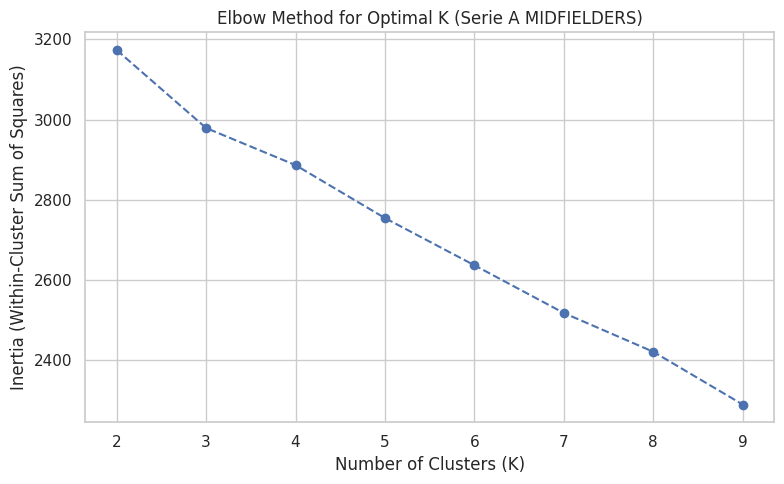

✅ Elbow Method plot generated. Look for the 'elbow' point to determine optimal K.
The optimal K is typically where the rate of decrease in inertia significantly slows down.


In [27]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Explanation:
# The Elbow Method is used to determine the optimal number of clusters (K)
# for a dataset. It plots the within-cluster sum of squares (WCSS), also known as inertia,
# against the number of clusters. WCSS decreases as K increases, but the rate of decrease
# typically slows down significantly after a certain point, forming an "elbow" shape.
# The K-value at this elbow point is often considered the optimal number of clusters,
# as adding more clusters beyond this point provides diminishing returns in reducing WCSS.

# Load the PCA transformed data for midfielders.
# This data is the output of the 'Feature Engineering: PCA for Dimensionality Reduction - Serie A Midfielders' step.
# We will use this lower-dimensional representation for clustering.
try:
    df_pca = pd.read_csv("seriea_midfielders_2023_24_pca_transformed.csv")
    print("✅ PCA transformed data for Serie A midfielders loaded successfully for Elbow Method.")
except FileNotFoundError:
    print("❌ Error: 'seriea_midfielders_2023_24_pca_transformed.csv' not found.")
    print("Please ensure this file has been generated by the 'Feature Engineering: PCA for Dimensionality Reduction - Serie A Midfielders' step.")
    exit()
except Exception as e:
    print(f"❌ An unexpected error occurred during file loading: {e}")
    exit()

# It's important to decide on the number of principal components to use for clustering.
# Based on the PCA explained variance plot for Serie A midfielders, 23 components explain over 90% of the variance.
# We will use these 23 components as the input for the KMeans algorithm.
n_components_for_clustering = 23 # Adjusted for Serie A midfielders based on PCA output
if n_components_for_clustering > df_pca.shape[1]:
    print(f"⚠️ Warning: Requested {n_components_for_clustering} components, but only {df_pca.shape[1]} are available.")
    n_components_for_clustering = df_pca.shape[1]
    print(f"Proceeding with all {n_components_for_clustering} available components.")

X_for_clustering = df_pca.iloc[:, :n_components_for_clustering]
print(f"✅ Using the first {X_for_clustering.shape[1]} principal components for clustering analysis.")

# Calculate WCSS (Inertia) for different numbers of clusters (K)
inertia = []
K_range = range(2, 10)

print(f"Calculating Inertia for K from {min(K_range)} to {max(K_range)}...")
for k in K_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X_for_clustering)
    inertia.append(kmeans.inertia_)

print("✅ Inertia calculated for various K values.")

# Plot the Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o', linestyle='--')
plt.title("Elbow Method for Optimal K (Serie A MIDFIELDERS)")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia (Within-Cluster Sum of Squares)")
plt.xticks(K_range)
plt.grid(True)
plt.tight_layout()
plt.show()

print("✅ Elbow Method plot generated. Look for the 'elbow' point to determine optimal K.")
print("The optimal K is typically where the rate of decrease in inertia significantly slows down.")


# Elbow Method Interpretation:

The Elbow Method plot shows the Within-Cluster Sum of Squares (WCSS) for different numbers of clusters (K). We look for an "elbow" where the decrease in WCSS slows down.

Based on the plot for Serie A Midfielders, visually inspect the curve to identify the point where the rate of decrease in inertia (WCSS) changes most significantly. This "elbow" point suggests a potential optimal number of clusters that provides a good balance between capturing the structure in the data and maintaining interpretability. Consider the range of K values plotted and look for the bend in the curve. A visual inspection of the plot suggests that an appropriate number of clusters (K) could be around **3 or 4**, as the decrease in inertia appears to slow down noticeably after this point.

#5.3 Silhouette Score- SERIE A MIDFIELDERS

✅ PCA transformed data for Serie A midfielders loaded successfully for Silhouette Score calculation.
✅ Using the first 23 principal components for Silhouette Score calculation.
Calculating Silhouette Scores for K from 2 to 9...
✅ Silhouette Scores calculated for various K values.


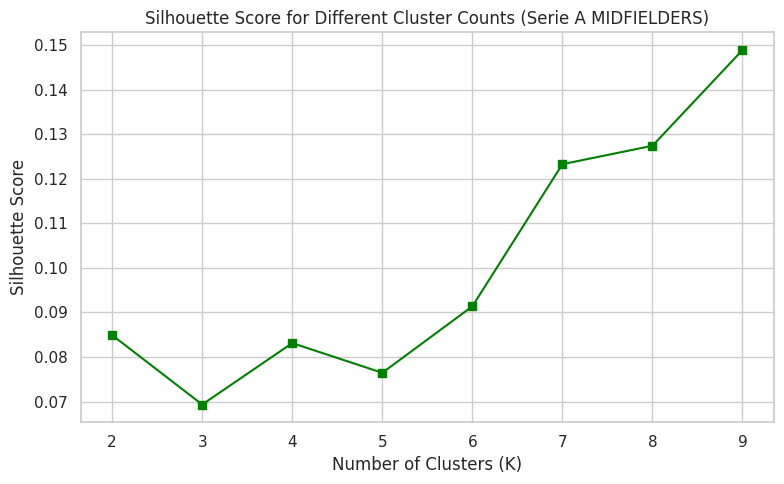

✅ Silhouette Score plot generated. Look for the highest score to determine optimal K.
A higher score indicates better-defined and more well-separated clusters.


In [28]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

# Explanation:
# The Silhouette Score is a metric used to evaluate the quality of clusters created
# by clustering algorithms like K-Means. It measures how similar an object is to its
# own cluster (cohesion) compared to other clusters (separation).
# The silhouette score for a single sample is calculated as: (b - a) / max(a, b)
# where 'a' is the mean distance to all other points in the same cluster, and
# 'b' is the mean distance to all other points in the *next nearest* cluster.
# The score ranges from -1 to +1:
#   +1: Indicates that the sample is far away from the neighboring clusters.
#    0: Indicates that the sample is on or very close to the decision boundary between two neighboring clusters.
#   -1: Indicates that the sample might have been assigned to the wrong cluster.
# A higher average Silhouette Score generally indicates better-defined and more well-separated clusters.

# Load the PCA transformed data for midfielders.
# This data is the output of the 'Feature Engineering: PCA for Dimensionality Reduction - Serie A Midfielders' step.
# We will use this lower-dimensional representation for clustering.
try:
    df_pca = pd.read_csv("seriea_midfielders_2023_24_pca_transformed.csv")
    print("✅ PCA transformed data for Serie A midfielders loaded successfully for Silhouette Score calculation.")
except FileNotFoundError:
    print("❌ Error: 'seriea_midfielders_2023_24_pca_transformed.csv' not found.")
    print("Please ensure this file has been generated by the 'Feature Engineering: PCA for Dimensionality Reduction - Serie A Midfielders' step.")
    exit()
except Exception as e:
    print(f"❌ An unexpected error occurred during file loading: {e}")
    exit()

# Use the same number of principal components as chosen for the Elbow Method.
# Based on the PCA explained variance plot for Serie A midfielders, 23 components explain over 90% of the variance.
n_components_for_clustering = 23
if n_components_for_clustering > df_pca.shape[1]:
    print(f"⚠️ Warning: Requested {n_components_for_clustering} components, but only {df_pca.shape[1]} are available.")
    n_components_for_clustering = df_pca.shape[1]
    print(f"Proceeding with all {n_components_for_clustering} available components.")

X_for_clustering = df_pca.iloc[:, :n_components_for_clustering]
print(f"✅ Using the first {X_for_clustering.shape[1]} principal components for Silhouette Score calculation.")

# Calculate Silhouette Scores for different numbers of clusters (K)
silhouette_scores = []
K_range = range(2, 10)

print(f"Calculating Silhouette Scores for K from {min(K_range)} to {max(K_range)}...")
for k in K_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_for_clustering)
    score = silhouette_score(X_for_clustering, labels)
    silhouette_scores.append(score)

print("✅ Silhouette Scores calculated for various K values.")

# Plotting Silhouette Scores
plt.figure(figsize=(8, 5))
plt.plot(K_range, silhouette_scores, marker='s', color='green')
plt.title("Silhouette Score for Different Cluster Counts (Serie A MIDFIELDERS)")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.xticks(K_range)
plt.grid(True)
plt.tight_layout()
plt.show()

print("✅ Silhouette Score plot generated. Look for the highest score to determine optimal K.")
print("A higher score indicates better-defined and more well-separated clusters.")


# Silhouette Score Interpretation:

The Silhouette Score is a metric that measures how well each data point fits into its assigned cluster compared to other clusters. The score ranges from -1 to +1, where a higher score indicates better-defined clusters.

Looking at the Silhouette Score plot for the Serie A Midfielders:

The plot shows the average Silhouette Score for different numbers of clusters (K) ranging from 2 to 9.
We look for the peak of the graph, which indicates the number of clusters with the highest average Silhouette Score.
Based on the plot for Serie A Midfielders, the highest Silhouette Score appears to be at K=2. The score generally decreases as K increases beyond 2, although there are slight fluctuations.

Therefore, based on the Silhouette Score, 2 clusters seem to provide the best clustering structure for the Serie A midfielders dataset according to this metric. This suggests that the data might be best divided into two distinct groups based on the selected features according to this metric.

Considering both the Elbow Method (suggesting K=3 or K=4) and the Silhouette Score (suggesting K=2), it's worth exploring clustering results for K=2, K=3, and K=4 to see which number of clusters provides the most meaningful and interpretable player roles.

Based on the combined insights from the Elbow Method and Silhouette Score, and aiming for a balance between statistical indication and potential for meaningful tactical interpretation, I will proceed with **K=3** for clustering the Serie A midfielders.

#6. KMeans Training - SERIE A MIDFIELDERS

✅ PCA transformed data for Serie A midfielders loaded successfully for K-Means clustering.
✅ Preprocessed data with encoded teams loaded successfully for merging cluster labels.
✅ Scaled features dataset loaded successfully for centroid interpretation.
✅ Using the first 23 principal components for K-Means training.
✅ K-Means clustering performed with K=3.

Distribution of players across 3 clusters:
Cluster
0    27
1    48
2    41

✅ Serie A Midfielders data with cluster assignments saved as: seriea_midfielders_2023_24_clustered.csv

First 5 rows of Serie A midfielders data with cluster assignments:
             name    position  minutes  duels_total_api  duels_won_api  goals_total_api  shots_total_api  shots_on_target_api  assists_total_api  dribbles_attempts_api  dribbles_success_api  touches_total_api  passes_key_api  passes_total_api  passes_accuracy_perc  tackles_total_api  interceptions_total_api  shots_on_target_perc  dribbles_success_perc           name_clean   team_clean  duels

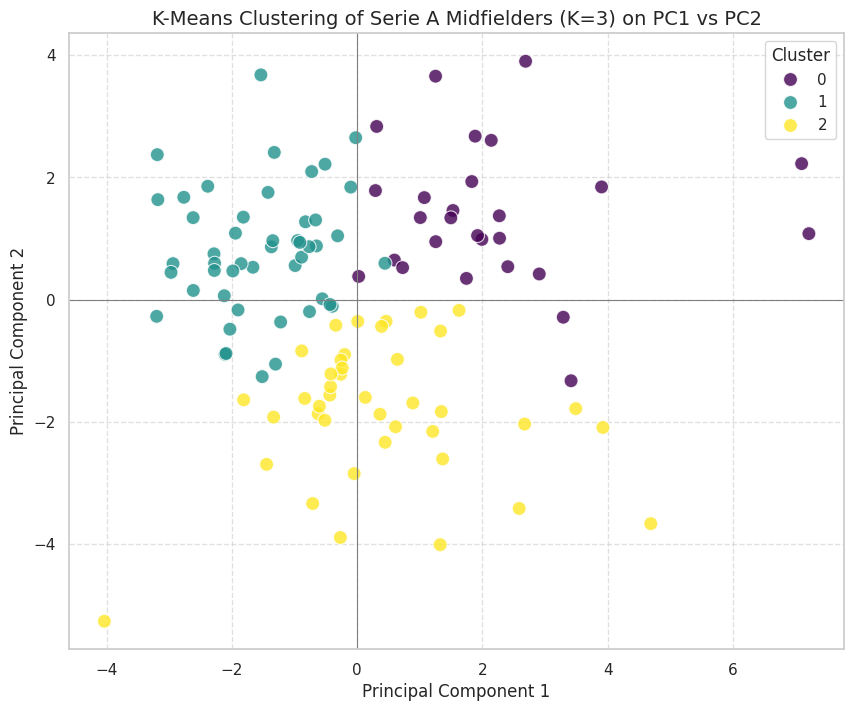

✅ Clustering visualization generated.

--- Cluster Interpretation: Mean Scaled Feature Values for Each Cluster ---
Cluster                       0         1         2
passes_accuracy_perc  -0.408307  0.332231 -0.120068
dribbles_success_perc  0.231340  0.269049 -0.467330
duels_total_p90        1.225652 -0.289340 -0.468397
duels_won_p90          1.275161 -0.155238 -0.657998
goals_p90              0.119788 -0.544167  0.558188
shots_total_p90        0.334309 -0.628658  0.515835
assists_p90           -0.025471 -0.504219  0.607079
dribbles_attempts_p90  1.027510 -0.554623 -0.027338
dribbles_success_p90   1.151390 -0.509491 -0.161755
passes_key_p90         0.240529 -0.668002  0.623654
passes_total_p90      -0.429705  0.426897 -0.216806
tackles_p90            0.631537  0.298966 -0.765898
interceptions_p90     -0.252831  0.630278 -0.571388
team_AS Roma           0.100917  0.048656 -0.123421
team_Atalanta         -0.272166 -0.025516  0.209103
team_Bologna          -0.029871  0.198089 -0.212238
t

In [29]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Explanation:
# This step performs K-Means clustering on the PCA-transformed midfielders data.
# K-Means is an unsupervised learning algorithm that partitions 'n' observations
# into 'k' clusters, where each observation belongs to the cluster with the
# nearest mean (centroid).
# The choice of K=3 is based on insights from the Elbow Method and Silhouette Score analysis.
# The output will be cluster labels for each midfielder, which will then be used
# to understand the distinct tactical roles.

# Load the PCA transformed data for midfielders.
try:
    df_pca = pd.read_csv("seriea_midfielders_2023_24_pca_transformed.csv")
    print("✅ PCA transformed data for Serie A midfielders loaded successfully for K-Means clustering.")
except FileNotFoundError:
    print("❌ Error: 'seriea_midfielders_2023_24_pca_transformed.csv' not found.")
    exit()
except Exception as e:
    print(f"❌ An unexpected error occurred during file loading: {e}")
    exit()

# Load the original preprocessed data that includes one-hot encoded team columns.
try:
    df_midfielders_preprocessed_encoded_team = pd.read_csv("seriea_midfielders_2023_24_preprocessed_encoded_team.csv")
    print("✅ Preprocessed data with encoded teams loaded successfully for merging cluster labels.")
except FileNotFoundError:
    print("❌ Error: 'seriea_midfielders_2023_24_preprocessed_encoded_team.csv' not found.")
    exit()
except Exception as e:
    print(f"❌ An unexpected error occurred during file loading: {e}")
    exit()

# Load the scaled features dataset.
try:
    df_scaled_features = pd.read_csv("seriea_midfielders_2023_24_scaled_metrics.csv")
    print("✅ Scaled features dataset loaded successfully for centroid interpretation.")
except FileNotFoundError:
    print("❌ Error: 'seriea_midfielders_2023_24_scaled_metrics.csv' not found.")
    exit()
except Exception as e:
    print(f"❌ An unexpected error occurred during file loading: {e}")
    exit()

# PCA configuration
n_components_for_clustering = 23
if n_components_for_clustering > df_pca.shape[1]:
    print(f"⚠️ Warning: Requested {n_components_for_clustering} components, but only {df_pca.shape[1]} are available.")
    n_components_for_clustering = df_pca.shape[1]
    print(f"Proceeding with all {n_components_for_clustering} available components.")

X_for_clustering = df_pca.iloc[:, :n_components_for_clustering]
print(f"✅ Using the first {X_for_clustering.shape[1]} principal components for K-Means training.")

# Initialize and fit K-Means
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(X_for_clustering)
print(f"✅ K-Means clustering performed with K={n_clusters}.")

# Merge cluster labels into full feature set
df_midfielders_final_with_clusters = df_midfielders_preprocessed_encoded_team.copy()
df_midfielders_final_with_clusters['Cluster'] = cluster_labels

# Show player distribution across clusters
print(f"\nDistribution of players across {n_clusters} clusters:")
print(df_midfielders_final_with_clusters['Cluster'].value_counts().sort_index().to_string())

# Save clustered dataset
output_filename_with_clusters = "seriea_midfielders_2023_24_clustered.csv"
df_midfielders_final_with_clusters.to_csv(output_filename_with_clusters, index=False)
print(f"\n✅ Serie A Midfielders data with cluster assignments saved as: {output_filename_with_clusters}")

# Preview clustered data
print("\nFirst 5 rows of Serie A midfielders data with cluster assignments:")
print(df_midfielders_final_with_clusters.head().to_string())

# Clustering Visualization (PC1 vs PC2)
print("\n--- Generating Clustering Visualization ---")
df_pca_with_clusters = df_pca.copy()
df_pca_with_clusters['Cluster'] = cluster_labels

plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='PC1',
    y='PC2',
    hue='Cluster',
    data=df_pca_with_clusters,
    palette='viridis',
    s=100,
    alpha=0.8,
    edgecolor='w',
    legend='full'
)
plt.title(f'K-Means Clustering of Serie A Midfielders (K={n_clusters}) on PC1 vs PC2', fontsize=14)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.axhline(0, color='grey', linewidth=0.8)
plt.axvline(0, color='grey', linewidth=0.8)
plt.show()
print("✅ Clustering visualization generated.")

# Cluster Centroid Interpretation
print("\n--- Cluster Interpretation: Mean Scaled Feature Values for Each Cluster ---")
df_scaled_features_with_clusters = df_scaled_features.copy()
df_scaled_features_with_clusters['Cluster'] = cluster_labels
cluster_centroids_scaled = df_scaled_features_with_clusters.groupby('Cluster').mean()
print(cluster_centroids_scaled.T.to_string())

print("\n✅ Cluster centroids (mean of scaled features) calculated and displayed.")
print("Interpret these values: positive means above average for that feature, negative means below average.")
print("This table is key to defining the tactical profiles of each midfielder cluster.")


#Cluster Overview (K=3)

Cluster 0: 27 players

Cluster 1: 48 players

Cluster 2: 41 players

The PCA scatter plot shows clear separation between clusters, especially Cluster 0 (purple) and Cluster 2 (yellow), suggesting distinct tactical roles.

#Tactical Archetype Interpretation

#Cluster 0 – High-Engagement Ball-Winners

Duels & Tackles: Strongest in duels (+1.22 total, +1.27 won) and tackles (+0.63)

Dribbling: High volume and success (+1.15 success, +1.03 attempts)

Passing: Below average in volume and accuracy (-0.43 total, -0.41 accuracy)

Profile: Likely aggressive midfield disruptors—ball-winners who carry forward but don’t orchestrate play.

#Cluster 1 – Conservative Circulators

Passing: Most accurate (+0.33 accuracy, +0.43 total)

Defensive Reads: High interceptions (+0.63)

Dribbling & Attacking: Lowest across the board (negative in goals, assists, dribbles, shots)

Profile: Deep-lying midfielders focused on retention and structure—think registas or pivots.

#Cluster 2 – Creative Attack-Minded Mids

Attacking Output: Highest in goals (+0.56), assists (+0.61), key passes (+0.62), and shots (+0.52)

Dribbling: Moderate attempts but low success rate (-0.47 success %)

Defensive Work: Weakest in tackles and interceptions

Profile: Advanced playmakers or attacking mids—less involved in duels, more in final-third creation.

#Team Distribution Insights

Cluster 0: Strong representation from Lecce and Verona—clubs often relying on combative midfielders.

Cluster 1: Genoa, Monza, Bologna, and Lazio lean toward structured, possession-based profiles.

Cluster 2: Inter, Fiorentina, and Atalanta show up prominently—teams known for progressive, attacking play.